# Data Cleansing

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [2]:
df = pd.read_pickle(r'C:\DataScience\PROJECT_AFIMILK\Data\Flat_File_for_cleansing\df_for_cleansing.p')

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns= 300

In [4]:
df.head()

FarmCode  DateMonth   DIM  CowID  FarmCowID   BirthDate CalvingDate  \
0       124          2  <NA>      1       1241  2017-12-26  2020-02-19   
1       124          2   308      1       1241  2017-12-26  2021-02-20   
2       124          1  <NA>     10      12410  2017-12-31  2020-01-14   
3       124          1   308     10      12410  2017-12-31  2021-01-08   
4       124          2  <NA>   1000    1241000  2017-12-25  2020-02-18   

     Cur_Date CurrentConceivedDate  Breed  Sys_Status  Gynecology_Status  \
0  2020-02-20           1900-01-01  30044       30034              30641   
1  2021-02-21           1900-01-01  30044       30034              30641   
2  2020-01-15           1900-01-01  30044       30034              30641   
3  2021-01-09           1900-01-01  30044       30034              30641   
4  2020-02-19           1900-01-01  30044       30034              30641   

   Herd_ID  Extended_Status  Heifer_Extend_Status  LactationNumber  \
0        1                0                     0                1   
1        1                0                     0                2   
2        1                0                     0                1   
3        1                0                     0                2   
4        1                0                     0                1   

   IsPreviousLactation  CurrentDryDays  Is_Ready_to_breed  Fertility_Num  \
0                    0            <NA>              43601           <NA>   
1                    0              57              44248              2   
2                    0            <NA>              43566           <NA>   
3                    0              50              44205              2   
4                    0            <NA>              43880           <NA>   

   WeightCalv  Parity123  Age_calc  Twin  Still  PrevDryDays  Term  PPUD  \
0         0.0          1        26     0      0            0   279     0   
1         0.0          2        38     0      0           58   282     0   
2         0.0          1        25     0      0            0   279     0   
3         0.0          2        37     0      0           51   273     0   
4         0.0          1        26     0      0            0   278     0   

   Is_Milked  Is_Milked_t1  Is_Milked_t2  Is_Milked_t3  Is_Milked_t4  \
0          1             1             1             1             1   
1          1             1             1             1             1   
2          1             1             1             1             1   
3          1             1             1             1             1   
4          1             1             1             1             1   

   Is_Milked_t5  Is_Milked_t6  Is_Milked_t7  DailyYield_KG  DailyYield_KG_t1  \
0             1             1             1         13.248             1.301   
1             1             1             1         17.263             7.197   
2             1             1             1         13.797             4.298   
3             1             1             1         20.432            -1.633   
4             1             1             1         17.574             0.195   

   DailyYield_KG_t2  DailyYield_KG_t3  DailyYield_KG_t4  DailyYield_KG_t5  \
0             2.393             1.955             2.924             1.246   
1             3.839             4.425             1.880             1.844   
2             2.453            -2.447             1.915             3.452   
3            16.949            -3.661             3.840             1.083   
4             2.931             0.478             1.690             0.445   

   DailyYield_KG_t6  DailyYield_KG_t7  TenDaysAvgYield_t7  \
0             0.646             0.572            17.55233   
1             1.958            -4.339            28.39489   
2             1.582             0.745            19.40711   
3             1.738            -0.196            30.24622   
4             1.220             0.226            20.10511   

   AccumulateYieldFrom

### Outliers 

In [5]:
cat_list = ['DateMonth'
,'Breed'
,'Sys_Status'
,'Gynecology_Status'
,'Herd_ID'
,'Extended_Status'
,'Heifer_Extend_Status'
,'IsPreviousLactation'
,'Is_Ready_to_breed'
,'Twin'
,'Still'
,'Term'
,'PPUD'
,'GroupChanged'
,'Is_Milked'
,'Is_Milked_t1'
,'Is_Milked_t2'
,'Is_Milked_t3'
,'Is_Milked_t4'
,'Is_Milked_t5'
,'Is_Milked_t6'
,'Is_Milked_t7'
,'CurEdma_t1_t7'
,'CurKET_t1_t7'
,'CurLAME_t1_t7'
,'CurLDA_t1_t7'
,'CurMAST_t1_t7'
,'CurMF_t1_t7'
,'CurPRO_t1_t7'
,'CurRP_t1_t7'
,'LastEdma_t1_t30'
,'LastKET_t1_t30'
,'LastLAME_t1_t30'
,'LastLDA_t1_t30'
,'LastMAST_t1_t30'
,'LastMF_t1_t30'
,'LastPRO_t1_t30'
,'CurMet_t7_t30']

for col in cat_list:
    df[col] = df[col].astype('category')

In [6]:
def get_col_list(df):
    col_list = {}    
    for c, t in zip(df.columns, df.dtypes):
        t_str = str(t)
        if col_list.get(t_str) == None:
            col_list[t_str] = [c]
        else:
            col_list[t_str].append(c)   
    return col_list

In [7]:
col_list = get_col_list(df)
col_list

{'int64': ['FarmCode',
  'CowID',
  'FarmCowID',
  'LactationNumber',
  'Age_calc',
  'PrevDryDays',
  'DailyProdRate',
  'DailyProdRate_t1',
  'DailyProdRate_t2',
  'DailyProdRate_t3',
  'DailyProdRate_t4',
  'DailyProdRate_t5',
  'DailyProdRate_t6',
  'DailyMilkingTime',
  'DailyMilkingTime_t1',
  'DailyMilkingTime_t2',
  'DailyMilkingTime_t3',
  'DailyMilkingTime_t4',
  'DailyMilkingTime_t5',
  'DailyMilkingTime_t6',
  'DailyActivity',
  'DailyActivity_t1',
  'DailyActivity_t2',
  'DailyActivity_t3',
  'DailyActivity_t4',
  'DailyActivity_t5',
  'DailyActivity_t6',
  'DailyHeatIndicator',
  'DailyHeatIndicator_t1',
  'DailyHeatIndicator_t2',
  'DailyHeatIndicator_t3',
  'DailyHeatIndicator_t4',
  'DailyHeatIndicator_t5',
  'DailyHeatIndicator_t6',
  'DailyRestRatio',
  'DailyRestRatio_t1',
  'DailyRestRatio_t2',
  'DailyRestRatio_t3',
  'DailyRestRatio_t4',
  'DailyRestRatio_t5',
  'DailyRestRatio_t6',
  'DailyRestRestlessness',
  'DailyRestRestlessness_t1',
  'DailyRestRestlessness

In [8]:
### Outliers Matrix
def Get_outlier_matrix(df, numeric_col_list):
    des = df.describe()
    outlier_matrix = pd.DataFrame()
    outlier_limits = []
    #numeric_col_list = col_list['int64'] + col_list['float64']
    for col in numeric_col_list:
        outlier_limit = []
        iqr = (des[col][6] - des[col][4]) * 1.5
        low_lim =  des[col][4] - iqr
        high_lim = des[col][6] + iqr
        outlier_matrix[col] = df[col].apply(lambda x: 1 if((x < low_lim ) or (x > high_lim)) else 0 )
        outlier_limit = {'var' : col, 'low_limit' : low_lim, 'high_limit' : high_lim, 'IQR' : iqr}
        outlier_limits.append(outlier_limit)
    return outlier_matrix, pd.DataFrame(outlier_limits)

In [9]:
outlier_matrix, outlier_limits= Get_outlier_matrix(df, col_list['int64'] + col_list['float64'])
outlier_matrix.head()


FarmCode  CowID  FarmCowID  LactationNumber  Age_calc  PrevDryDays  \
0         0      0          0                0         0            0   
1         0      0          0                0         0            0   
2         0      0          0                0         0            0   
3         0      0          0                0         0            0   
4         0      0          0                0         0            0   

   DailyProdRate  DailyProdRate_t1  DailyProdRate_t2  DailyProdRate_t3  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   
2              0                 0                 0                 0   
3              0                 0                 1                 1   
4              0                 0                 0                 0   

   DailyProdRate_t4  DailyProdRate_t5  DailyProdRate_t6  DailyMilkingTime  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   DailyMilkingTime_t1  DailyMilkingTime_t2  DailyMilkingTime_t3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   DailyMilkingTime_t4  DailyMilkingTime_t5  DailyMilkingTime_t6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    1                    1                    0   
4                    0                    0                    0   

   DailyActivity  DailyActivity_t1  DailyActivity_t2  DailyActivity_t3  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   
2              0                 0                 0                 0   
3              0                 0                 1                 0   
4              0                 0                 0                 0   

   DailyActivity_t4  DailyActivity_t5  DailyActivity_t6  DailyHeatIndicator  \
0                 0                 0                 0                   0   
1                 0                 0                 0                   0   
2                 0                 0                 0                   0   
3                 0                 1                 1                   0   
4                 0                 0                 0                   0   

   DailyHeatIndicator_t1  DailyHeatIndicator_t2  DailyHeatIndicator_t3  \
0                      0                      0                      0   
1                      0                      0                      1   
2                      0                      0                      0   
3                      0                      1                      1   
4                      0                      0                      0   

   DailyHeatIndicator_t4  DailyHeatIndicator_t5  DailyHeatIndicator_t6  \
0                      1                      0                      0   
1                      0                      0                      0   
2                      1                      0                      0   
3                      0                      1                      0   
4                      0                      0                      0   

   DailyRestRatio  DailyRest

In [10]:
outlier_limits

var     low_limit    high_limit           IQR
0                           FarmCode -1.060000e+02  2.620000e+02  1.380000e+02
1                              CowID -5.354000e+03  1.139000e+04  6.279000e+03
2                          FarmCowID -1.150364e+06  2.250408e+06  1.275290e+06
3                    LactationNumber -2.000000e+00  6.000000e+00  3.000000e+00
4                           Age_calc -1.400000e+01  9.000000e+01  3.900000e+01
5                        PrevDryDays -9.450000e+01  1.575000e+02  9.450000e+01
6                      DailyProdRate -2.300000e+02  1.458000e+03  6.330000e+02
7                   DailyProdRate_t1 -2.400000e+02  7.760000e+02  3.810000e+02
8                   DailyProdRate_t2 -2.300000e+02  4.740000e+02  2.640000e+02
9                   DailyProdRate_t3 -1.995000e+02  3.885000e+02  2.205000e+02
10                  DailyProdRate_t4 -1.905000e+02  3.495000e+02  2.025000e+02
11                  DailyProdRate_t5 -1.880000e+02  3.320000e+02  1.950000e+02
12                  DailyProdRate_t6 -1.910000e+02  3.050000e+02  1.860000e+02
13                  DailyMilkingTime  1.045000e+02  5.005000e+02  1.485000e+02
14               DailyMilkingTime_t1 -1.700000e+02  1.660000e+02  1.260000e+02
15               DailyMilkingTime_t2 -1.350000e+02  1.370000e+02  1.020000e+02
16               DailyMilkingTime_t3 -1.275000e+02  1.245000e+02  9.450000e+01
17               DailyMilkingTime_t4 -1.140000e+02  1.180000e+02  8.700000e+01
18               DailyMilkingTime_t5 -1.130000e+02  1.190000e+02  8.700000e+01
19               DailyMilkingTime_t6 -1.110000e+02  1.210000e+02  8.700000e+01
20                     DailyActivity  8.500000e+00  4.205000e+02  1.545000e+02
21                  DailyActivity_t1 -1.480000e+02  1.240000e+02  1.020000e+02
22                  DailyActivity_t2 -1.225000e+02  9.750000e+01  8.250000e+01
23                  DailyActivity_t3 -1.080000e+02  8.400000e+01  7.200000e+01
24                  DailyActivity_t4 -8.650000e+01  7.750000e+01  6.150000e+01
25                  DailyActivity_t5 -7.650000e+01  7.150000e+01  5.550000e+01
26                  DailyActivity_t6 -7.100000e+01  7.300000e+01  5.400000e+01
27                DailyHeatIndicator -2.100000e+02  3.500000e+02  2.100000e+02
28             DailyHeatIndicator_t1 -7.750000e+01  4.650000e+01  4.650000e+01
29             DailyHeatIndicator_t2 -4.750000e+01  2.850000e+01  2.850000e+01
30             DailyHeatIndicator_t3 -3.750000e+01  2.250000e+01  2.250000e+01
31             DailyHeatIndicator_t4 -3.500000e+01  2.900000e+01  2.400000e+01
32             DailyHeatIndicator_t5 -5.300000e+01  5.100000e+01  3.900000e+01
33             DailyHeatIndicator_t6 -4.450000e+01  4.750000e+01  3.450000e+01
34                    DailyRestRatio -5.200000e+01  8.400000e+01  5.100000e+01
35                 DailyRestRatio_t1 -9.000000e+00  1.500000e+01  9.000000e+00
36                 DailyRestRatio_t2 -6.000000e+00  1.000000e+01  6.000000e+00
37                 DailyRestRatio_t3 -7.000000e+00  9.000000e+00  6.000000e+00
38                 DailyRestRatio_t4 -6.500000e+00  5.500000e+00  4.500000e+00
39                 DailyRestRatio_t5 -9.000000e+00  7.000000e+00  6.000000e+00
40                 DailyRestRatio_t6 -9.000000e+00  7.000000e+00  6.000000e+00
41             DailyRestRestlessness -6.400000e+01  1.040000e+02  6.300000e+01
42          DailyRestRestlessness_t1 -1.400000e+01  1.800000e+01  1.200000e+01
43          DailyRestRestlessness_t2 -2.250000e+01  1.350000e+01  1.350000e+01
44          DailyRestRestlessness_t3 -1.250000e+01  7.500000e+00  7.500000e+00
45          DailyRestRestlessness_t4 -8.000000e+00  8.000000e+00  6.000000e+00
46          DailyRestRestlessness_t5 -9.500000e+00  1.050000e+01  7.500000e+00
47          DailyRestRestlessness_t6 -8.500000e+00  1.150000e+01  7.500000e+00
48                  DailyRestPerBout -7.000000e+01  1.140000e+02  6.900000e+01
49               DailyRestPerBout_t1 -2.100000e+01  3.500000e+01  2.100000e+01
50  

In [11]:
outliers_count = pd.DataFrame(outlier_matrix.sum()).sort_values(by=0, ascending=False)
outliers_count.rename(columns= {0 : 'outliers_count'})

outliers_count
DailyRestBout_t4                           1151
DailyRestRestlessness_t1                   1150
DailyRestRestlessness_t4                   1064
DailyRestRestlessness_t3                   1048
DailyRestRatio_t4                          1047
DailyRestPerBout_t2                         972
DailyRestRestlessness_t5                    959
DailyRestTime_t6                            948
DailyRestPerBout_t3                         945
DailyRestRestlessness_t6                    939
DailyRestPerBout_t5                         936
DailyRestBout_t1                            891
DailyRestRatio_t2                           888
DailyRestPerBout_t6                         887
DailyRestTime_t3                            881
DailyRestTime_t5                            879
DailyRestTime_t4                            873
DailyRestRestlessness_t2                    860
DailyRestTime_t2                            860
DailyRestRatio_t1                           855
DailyRestTime_t1                            853
DailyRestPerBout_t4                         839
DailyRestRatio_t3                           799
DailyRestRatio_t6                           751
DailyRestRatio_t5                           749
DailyRestPerBout_t1                         717
DailyHeatIndicator_t4                       647
DailyRestBout_t2                            623
DailyHeatIndicator_t2                       605
DailyRestBout_t3                            604
DailyRestBout_t5                            603
DailyHeatIndicator_t3                       583
DailyRestBout_t6                            577
DailyHeatIndicator                          558
DailyHeatIndicator_t1                       509
DailyActivity                               384
DailyMilkingTime_t1                         336
DailyHeatIndicator_t5                       335
DailyMilkingTime_t2                         333
DailyMilkingTime_t5                         322
DailyConductivity_t3                        319
DailyMilkingTime_t4                         313
DailyProdRate_t6                            312
DailyMilkingTime_t6                         305
DailyMilkingTime_t3                         302
DailyActivity_t2                            288
DailyProdRate_t5                            282
DailyActivity_t1                            282
DailyProdRate_t3                            282
DailyProdRate_t4                            280
DailyFat_KG_t7                              274
DailyActivity_t3                            271
DailyYield_KG_t6                            270
ECM_KG_t3                                   270
DailyProdRate_t2                            268
DailyYield_KG_t7                            268
DailyConductivity_t4                        268
ECM_KG_t6                                   264
ECM_KG_t7                                   263
DailyFat_KG_t5                              262
ECM_KG_t4                                   260
DailyFat_KG_t6                              253
DailyProtein_P_t2                           246
DailyYield_KG_t5                            244
DailyYield_KG_t3                            242
ECM_KG_t5                                   241
DailyYield_KG_t4                            239
DailyConductivity_t5                        238
DailyProtein_KG_t6                          237
DailyFat_KG_t4                              237
DailyProtein_P_t1                           236
DailyProtein_KG_t3                          234
DailyHeatIndicator_t6                       229
DailyProtein_KG_t7                          229
DailyProtein_P_t7                           227
DailyConductivity_t7                        227
DailyProtein_P_t6                           225
DailyYield_KG_t2                            225
DailyFPR_P_t5                               225
DailyFPR_P_t6                               224
DailyProtein_KG_t4                          224
DailyProtein_P_t3                           223
DailyConductivity_t6                        222
D

In [12]:
### find 0 values rate
results = []
for col in col_list['int64']:
    res = {"var": col, "0 count":  df[col][df[col] == 0].shape[0] , "rate":  df[col][df[col] == 0].shape[0]/len(df[col]) *100}
    results.append(res)
###
results = pd.DataFrame(results)
results[results['0 count'] > 0].sort_values("rate", ascending=False)

var  0 count       rate
67          DailyRestBout_t5     1619  47.105033
30     DailyHeatIndicator_t3     1608  46.784987
68          DailyRestBout_t6     1607  46.755892
66          DailyRestBout_t4     1607  46.755892
64          DailyRestBout_t2     1602  46.610416
29     DailyHeatIndicator_t2     1595  46.406750
65          DailyRestBout_t3     1582  46.028513
63          DailyRestBout_t1     1565  45.533896
28     DailyHeatIndicator_t1     1475  42.915333
37         DailyRestRatio_t3     1475  42.915333
39         DailyRestRatio_t5     1472  42.828048
35         DailyRestRatio_t1     1467  42.682572
40         DailyRestRatio_t6     1465  42.624382
36         DailyRestRatio_t2     1456  42.362525
46  DailyRestRestlessness_t5     1454  42.304335
47  DailyRestRestlessness_t6     1454  42.304335
44  DailyRestRestlessness_t3     1446  42.071574
38         DailyRestRatio_t4     1443  41.984289
49       DailyRestPerBout_t1     1432  41.664242
54       DailyRestPerBout_t6     1431  41.635147
42  DailyRestRestlessness_t1     1430  41.606052
51       DailyRestPerBout_t3     1430  41.606052
45  DailyRestRestlessness_t4     1429  41.576957
50       DailyRestPerBout_t2     1422  41.373291
43  DailyRestRestlessness_t2     1422  41.373291
52       DailyRestPerBout_t4     1417  41.227815
53       DailyRestPerBout_t5     1416  41.198720
56          DailyRestTime_t1     1378  40.093104
61          DailyRestTime_t6     1373  39.947629
58          DailyRestTime_t3     1368  39.802153
57          DailyRestTime_t2     1365  39.714868
59          DailyRestTime_t4     1359  39.540297
60          DailyRestTime_t5     1359  39.540297
5                PrevDryDays     1339  38.958394
31     DailyHeatIndicator_t4     1173  34.128601
27        DailyHeatIndicator     1092  31.771894
32     DailyHeatIndicator_t5      423  12.307245
33     DailyHeatIndicator_t6      296   8.612162
20             DailyActivity      275   8.001164
21          DailyActivity_t1      163   4.742508
22          DailyActivity_t2      152   4.422461
6              DailyProdRate      127   3.695083
24          DailyActivity_t4      120   3.491417
23          DailyActivity_t3      120   3.491417
25          DailyActivity_t5      116   3.375036
26          DailyActivity_t6      110   3.200466
15       DailyMilkingTime_t2       76   2.211231
18       DailyMilkingTime_t5       73   2.123945
16       DailyMilkingTime_t3       72   2.094850
17       DailyMilkingTime_t4       68   1.978470
13          DailyMilkingTime       62   1.803899
8           DailyProdRate_t2       62   1.803899
19       DailyMilkingTime_t6       59   1.716613
10          DailyProdRate_t4       52   1.512947
7           DailyProdRate_t1       50   1.454757
11          DailyProdRate_t5       49   1.425662
9           DailyProdRate_t3       48   1.396567
14       DailyMilkingTime_t1       44   1.280186
12          DailyProdRate_t6       38   1.105615
48          DailyRestPerBout       10   0.290951
34            DailyRestRatio       10   0.290951
41     DailyRestRestlessness        9   0.261856
55             DailyRestTime        6   0.174571
62             DailyRestBout        5   0.145476

In [13]:
### check the "describe" without 0 values 
ol_list = outliers_count[outliers_count[0] >= 500].index.values.tolist()
for i in ol_list:
    print('Column Name:', i)
    print(df[i][df[i] != 0].describe())

Column Name: DailyRestBout_t4
count    1830.000000
mean        0.266667
std         7.380166
min      -178.000000
25%        -3.000000
50%         1.000000
75%         3.000000
max        33.000000
Name: DailyRestBout_t4, dtype: float64
Column Name: DailyRestRestlessness_t1
count    2007.000000
mean        7.166418
std        71.326180
min      -581.000000
25%       -16.000000
50%         2.000000
75%        27.000000
max      1673.000000
Name: DailyRestRestlessness_t1, dtype: float64
Column Name: DailyRestRestlessness_t4
count    2008.000000
mean       -2.356076
std        76.360715
min     -1812.000000
25%       -10.000000
50%         1.000000
75%         9.000000
max      1405.000000
Name: DailyRestRestlessness_t4, dtype: float64
Column Name: DailyRestRestlessness_t3
count    1991.000000
mean       -5.884480
std        56.906197
min     -1012.000000
25%       -16.000000
50%        -3.000000
75%         6.000000
max      1576.000000
Name: DailyRestRestlessness_t3, dtype: float64
Colu

### Outliers - Make desission 

In [14]:
### Checing distribution difrences with and without outliers
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import kruskal

def Check_dist_w_wo_outlier(df, outlier_matrix, outcome_cat):
    results = []
    for col in outlier_matrix.columns:
        ### check distribution changed
        df_orig = df[col]
        df_wo_outliers = df[col][outlier_matrix[col] == 0]
        stat_dist, pval_dist = ks_2samp(df_orig, df_wo_outliers, mode='asymp')
        #
        distribution_changed = '+' if pval_dist < 0.05 else '-'
        ### check correlation with outcome changed
        tmp = df[[col,outcome_cat]]
        tmp1 = tmp.dropna(axis = 0 , inplace = False) 
        stat_corr1, pval_corr1 = kruskal(tmp1[col], tmp1[outcome_cat])
        #
        tmp_wo = tmp[outlier_matrix[col] == 0]
        tmp_wo = tmp_wo.dropna(axis = 0 , inplace = False) 
        stat_corr2, pval_corr2 = kruskal(tmp_wo[col], tmp_wo[outcome_cat])
        #
        correlation_changed = '+' if pval_corr1 < 0.05 and pval_corr2 > 0.05 or pval_corr1 > 0.05 and pval_corr2 < 0.05 else '-'
        ###
        res = {'column_name' : col
              ,'distribution_statistic' : stat_dist
              ,'distribution_p_value'   : pval_dist
              ,'outliers_count'         : outlier_matrix[col].sum()
              ,'outliers_rate'          : outlier_matrix[col].sum()/len(outlier_matrix[col])*100
              ,'outlier_low_limit'      : outlier_limits['low_limit'][outlier_limits['var'] == col].values
              ,'outlier_high_limit'     : outlier_limits['high_limit'][outlier_limits['var'] == col].values
              ,'distribution_changed'   : distribution_changed
              ,'correlation_changed'    : correlation_changed
              ,'Drop_outliers'          : 'No' if distribution_changed == '+' and correlation_changed == '+' else 'Yes'} 
        results.append(res)
    return pd.DataFrame(results)

In [15]:
outlier_limits['high_limit'][outlier_limits['var'] == 'DailyRestBout_t4'].values

array([2.5])

In [16]:
outliers_rec = Check_dist_w_wo_outlier(df, outlier_matrix, 'CurMet_t7_t30').sort_values(by = ['outliers_count'], ascending = False )
outliers_rec

column_name  distribution_statistic  \
66                  DailyRestBout_t4                0.179808   
42          DailyRestRestlessness_t1                0.179808   
45          DailyRestRestlessness_t4                0.156823   
44          DailyRestRestlessness_t3                0.172243   
38                 DailyRestRatio_t4                0.152749   
50               DailyRestPerBout_t2                0.141693   
46          DailyRestRestlessness_t5                0.146058   
61                  DailyRestTime_t6                0.143148   
51               DailyRestPerBout_t3                0.139075   
47          DailyRestRestlessness_t6                0.140239   
53               DailyRestPerBout_t5                0.137329   
63                  DailyRestBout_t1                0.162642   
36                 DailyRestRatio_t2                0.129473   
54               DailyRestPerBout_t6                0.130928   
58                  DailyRestTime_t3                0.134129   
60                  DailyRestTime_t5                0.133838   
59                  DailyRestTime_t4                0.129473   
43          DailyRestRestlessness_t2                0.136456   
57                  DailyRestTime_t2                0.125691   
35                 DailyRestRatio_t1                0.158278   
56                  DailyRestTime_t1                0.157405   
52               DailyRestPerBout_t4                0.123654   
37                 DailyRestRatio_t3                0.120163   
40                 DailyRestRatio_t6                0.113180   
39                 DailyRestRatio_t5                0.113762   
49               DailyRestPerBout_t1                0.135874   
31             DailyHeatIndicator_t4                0.099214   
64                  DailyRestBout_t2                0.093395   
29             DailyHeatIndicator_t2                0.123072   
65                  DailyRestBout_t3                0.089322   
67                  DailyRestBout_t5                0.087867   
30             DailyHeatIndicator_t3                0.124527   
68                  DailyRestBout_t6                0.088740   
27                DailyHeatIndicator                0.162351   
28             DailyHeatIndicator_t1                0.110852   
20                     DailyActivity                0.080594   
14               DailyMilkingTime_t1                0.048880   
32             DailyHeatIndicator_t5                0.070410   
15               DailyMilkingTime_t2                0.049462   
18               DailyMilkingTime_t5                0.048298   
149             DailyConductivity_t3                0.051789   
17               DailyMilkingTime_t4                0.046261   
12                  DailyProdRate_t6                0.048589   
19               DailyMilkingTime_t6                0.046552   
16               DailyMilkingTime_t3                0.045097   
22                  DailyActivity_t2                0.044225   
11                  DailyProdRate_t5                0.041897   
21                  DailyActivity_t1                0.050335   
9                   DailyProdRate_t3                0.043934   
10                  DailyProdRate_t4                0.041024   
99                    DailyFat_KG_t7                0.040392   
23                  DailyActivity_t3                0.051789   
76                  DailyYield_KG_t6                0.041897   
129                        ECM_KG_t3                0.043061   
8                   DailyProdRate_t2                0.044807   
77                  DailyYield_KG_t7                0.039229   
150             DailyConductivity_t4                0.039860   
132                        ECM_KG_t6                0.039278   
133                        ECM_KG_t7                0.039569   
97                    DailyFat_KG_t5                0.044225   
130                        ECM_KG_t4                0.039278   
98                    DailyFat_KG_t6                0.041

In [17]:
outliers_rec[outliers_rec.Drop_outliers == 'No']

column_name  distribution_statistic  distribution_p_value  \
35    DailyRestRatio_t1                0.158278          1.011479e-32   
56     DailyRestTime_t1                0.157405          2.189204e-32   
49  DailyRestPerBout_t1                0.135874          6.636637e-25   

    outliers_count  outliers_rate outlier_low_limit outlier_high_limit  \
35             855      24.876346            [-9.0]             [15.0]   
56             853      24.818155          [-139.5]            [232.5]   
49             717      20.861216           [-21.0]             [35.0]   

   distribution_changed correlation_changed Drop_outliers  
35                    +                   +            No  
56                    +                   +            No  
49                    +                   +            No

In [18]:
outliers_rec[outliers_rec.Drop_outliers == 'Yes']

column_name  distribution_statistic  \
66                  DailyRestBout_t4                0.179808   
42          DailyRestRestlessness_t1                0.179808   
45          DailyRestRestlessness_t4                0.156823   
44          DailyRestRestlessness_t3                0.172243   
38                 DailyRestRatio_t4                0.152749   
50               DailyRestPerBout_t2                0.141693   
46          DailyRestRestlessness_t5                0.146058   
61                  DailyRestTime_t6                0.143148   
51               DailyRestPerBout_t3                0.139075   
47          DailyRestRestlessness_t6                0.140239   
53               DailyRestPerBout_t5                0.137329   
63                  DailyRestBout_t1                0.162642   
36                 DailyRestRatio_t2                0.129473   
54               DailyRestPerBout_t6                0.130928   
58                  DailyRestTime_t3                0.134129   
60                  DailyRestTime_t5                0.133838   
59                  DailyRestTime_t4                0.129473   
43          DailyRestRestlessness_t2                0.136456   
57                  DailyRestTime_t2                0.125691   
52               DailyRestPerBout_t4                0.123654   
37                 DailyRestRatio_t3                0.120163   
40                 DailyRestRatio_t6                0.113180   
39                 DailyRestRatio_t5                0.113762   
31             DailyHeatIndicator_t4                0.099214   
64                  DailyRestBout_t2                0.093395   
29             DailyHeatIndicator_t2                0.123072   
65                  DailyRestBout_t3                0.089322   
67                  DailyRestBout_t5                0.087867   
30             DailyHeatIndicator_t3                0.124527   
68                  DailyRestBout_t6                0.088740   
27                DailyHeatIndicator                0.162351   
28             DailyHeatIndicator_t1                0.110852   
20                     DailyActivity                0.080594   
14               DailyMilkingTime_t1                0.048880   
32             DailyHeatIndicator_t5                0.070410   
15               DailyMilkingTime_t2                0.049462   
18               DailyMilkingTime_t5                0.048298   
149             DailyConductivity_t3                0.051789   
17               DailyMilkingTime_t4                0.046261   
12                  DailyProdRate_t6                0.048589   
19               DailyMilkingTime_t6                0.046552   
16               DailyMilkingTime_t3                0.045097   
22                  DailyActivity_t2                0.044225   
11                  DailyProdRate_t5                0.041897   
21                  DailyActivity_t1                0.050335   
9                   DailyProdRate_t3                0.043934   
10                  DailyProdRate_t4                0.041024   
99                    DailyFat_KG_t7                0.040392   
23                  DailyActivity_t3                0.051789   
76                  DailyYield_KG_t6                0.041897   
129                        ECM_KG_t3                0.043061   
8                   DailyProdRate_t2                0.044807   
77                  DailyYield_KG_t7                0.039229   
150             DailyConductivity_t4                0.039860   
132                        ECM_KG_t6                0.039278   
133                        ECM_KG_t7                0.039569   
97                    DailyFat_KG_t5                0.044225   
130                        ECM_KG_t4                0.039278   
98                    DailyFat_KG_t6                0.041315   
107                DailyProtein_P_t2                0.039278   
75                  DailyYield_KG_t5                0.036951   
73                  DailyYield_KG_t3                0.035

### Remove outliers - replace with NaN

In [19]:
drop_outliers_list = list(outliers_rec['column_name'][outliers_rec['Drop_outliers'] == 'Yes'])

drop_outliers_list.remove('Age_calc')
drop_outliers_list.remove('LactationNumber')
drop_outliers_list.remove('FarmCowID')
drop_outliers_list.remove('CowID')
drop_outliers_list.remove('FarmCode')

In [20]:
df_wo_outliers = df.copy()
outlier_matrix1 = outlier_matrix.copy()

outlier_matrix1 = outlier_matrix1.replace(1, np.nan)
outlier_matrix1 = outlier_matrix1.replace(0,1)

for col in drop_outliers_list:
    df_wo_outliers[col] = df_wo_outliers[col] * outlier_matrix1[col]

In [21]:
df_wo_outliers.isnull().sum() 

FarmCode                              0
DateMonth                             0
DIM                                 576
CowID                                 0
FarmCowID                             0
BirthDate                             0
CalvingDate                           0
Cur_Date                              0
CurrentConceivedDate                  0
Breed                                 0
Sys_Status                            0
Gynecology_Status                     0
Herd_ID                               0
Extended_Status                       0
Heifer_Extend_Status                  0
LactationNumber                       0
IsPreviousLactation                   0
CurrentDryDays                      576
Is_Ready_to_breed                     0
Fertility_Num                       576
WeightCalv                            0
Parity123                             0
Age_calc                              0
Twin                                  0
Still                                 0


# Missing values

In [22]:
df_wo_missing = df_wo_outliers.copy()
missingness_matrix = df_wo_outliers.isnull().astype('int64')

In [23]:
missingness_matrix

FarmCode  DateMonth  DIM  CowID  FarmCowID  BirthDate  CalvingDate  \
0            0          0    1      0          0          0            0   
1            0          0    0      0          0          0            0   
2            0          0    1      0          0          0            0   
3            0          0    0      0          0          0            0   
4            0          0    1      0          0          0            0   
...        ...        ...  ...    ...        ...        ...          ...   
3432         0          0    0      0          0          0            0   
3433         0          0    0      0          0          0            0   
3434         0          0    0      0          0          0            0   
3435         0          0    0      0          0          0            0   
3436         0          0    0      0          0          0            0   

      Cur_Date  CurrentConceivedDate  Breed  Sys_Status  Gynecology_Status  \
0            0                     0      0           0                  0   
1            0                     0      0           0                  0   
2            0                     0      0           0                  0   
3            0                     0      0           0                  0   
4            0                     0      0           0                  0   
...        ...                   ...    ...         ...                ...   
3432         0                     0      0           0                  0   
3433         0                     0      0           0                  0   
3434         0                     0      0           0                  0   
3435         0                     0      0           0                  0   
3436         0                     0      0           0                  0   

      Herd_ID  Extended_Status  Heifer_Extend_Status  LactationNumber  \
0           0                0                     0                0   
1           0                0                     0                0   
2           0                0                     0                0   
3           0                0                     0                0   
4           0                0                     0                0   
...       ...              ...                   ...              ...   
3432        0                0                     0                0   
3433        0                0                     0                0   
3434        0                0                     0                0   
3435        0                0                     0                0   
3436        0                0                     0                0   

      IsPreviousLactation  CurrentDryDays  Is_Ready_to_breed  Fertility_Num  \
0                       0               1                  0              1   
1                       0               0                  0              0   
2                       0               1                  0              1   
3                       0               0                  0              0   
4                       0               1                  0              1   
...                   ...             ...                ...            ...   
3432                    0               0                  0              0   
3433                    0               0                  0              0   
3434                    0               0                  0              0   
3435                    0               0                  0              0   
3436                    0               0                  0              0   

      WeightCalv  Parity123  Age_calc  Twin  Still  PrevDryDays  Term  PPUD  \
0              0          0         0     0      0            0     0     0   
1              0          0         0     0      0            0     0     0   
2              0          0         0     0      0            0     0     0   
3             

In [24]:
missingness_matrix.sum()

FarmCode                              0
DateMonth                             0
DIM                                 576
CowID                                 0
FarmCowID                             0
BirthDate                             0
CalvingDate                           0
Cur_Date                              0
CurrentConceivedDate                  0
Breed                                 0
Sys_Status                            0
Gynecology_Status                     0
Herd_ID                               0
Extended_Status                       0
Heifer_Extend_Status                  0
LactationNumber                       0
IsPreviousLactation                   0
CurrentDryDays                      576
Is_Ready_to_breed                     0
Fertility_Num                       576
WeightCalv                            0
Parity123                             0
Age_calc                              0
Twin                                  0
Still                                 0


In [25]:
df_wo_outliers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3437 entries, 0 to 3436
Data columns (total 219 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   FarmCode                         int64   
 1   DateMonth                        category
 2   DIM                              Int64   
 3   CowID                            int64   
 4   FarmCowID                        int64   
 5   BirthDate                        object  
 6   CalvingDate                      object  
 7   Cur_Date                         object  
 8   CurrentConceivedDate             object  
 9   Breed                            category
 10  Sys_Status                       category
 11  Gynecology_Status                category
 12  Herd_ID                          category
 13  Extended_Status                  category
 14  Heifer_Extend_Status             category
 15  LactationNumber                  int64   
 16  IsPreviousLactation              category

<AxesSubplot:>

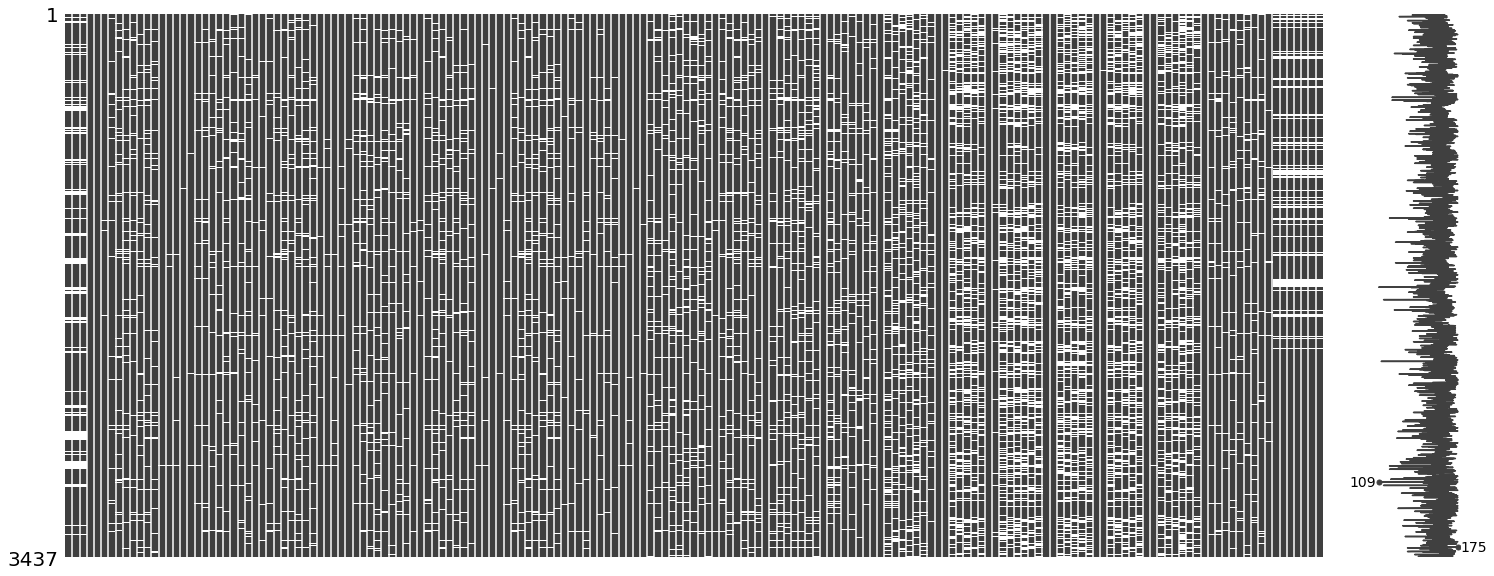

In [26]:
import missingno as msno
plt.close()
missing_col_list = df_wo_outliers.columns[df_wo_outliers.isnull().any()].tolist()
msno.matrix(df_wo_outliers[missing_col_list])

### Rate of missingness in rows

In [27]:
missingness_rows = pd.DataFrame()
missingness_rows['row_num'] = missingness_matrix.index 
missingness_rows['row_null'] = missingness_matrix.sum(axis=1) 
missingness_rows['row_null_rate'] = missingness_matrix.sum(axis=1) / len(missingness_matrix.columns) *100


In [28]:
missingness_rows.sort_values(by='row_null_rate',ascending=False)

row_num  row_null  row_null_rate
1728     1728        66      30.136986
2958     2958        66      30.136986
2197     2197        64      29.223744
2981     2981        62      28.310502
1807     1807        62      28.310502
...       ...       ...            ...
2063     2063         0       0.000000
3012     3012         0       0.000000
1197     1197         0       0.000000
906       906         0       0.000000
741       741         0       0.000000

[3437 rows x 3 columns]

##### no line should be removed due to missing values in rows

### Rate of missingness in columns

In [29]:
def Rate_of_na_in_columns(df):
    col_list = df.columns
    df_sum_of_na =  df.isna().sum() 
    num_of_records = len(df)
    results = []
    for col in col_list:
        na_count = df_sum_of_na[col]
        res = {"var": col,
               "type" : df[col].dtype,
               "na.count": na_count, 
               "rate": na_count/num_of_records * 100.0}
        results.append(res)
    results = pd.DataFrame(results).sort_values("rate", ascending=False)
    return results

In [30]:
missing_rate = Rate_of_na_in_columns(df_wo_outliers).reset_index()
missing_rate[missing_rate['rate'] > 0]

index                              var      type  na.count       rate
0      189                 DailyRestBout_t4   float64      1151  33.488507
1      162         DailyRestRestlessness_t1   float64      1150  33.459412
2      165         DailyRestRestlessness_t4   float64      1064  30.957230
3      164         DailyRestRestlessness_t3   float64      1048  30.491708
4      157                DailyRestRatio_t4   float64      1047  30.462613
5      171              DailyRestPerBout_t2   float64       972  28.280477
6      166         DailyRestRestlessness_t5   float64       959  27.902240
7      183                 DailyRestTime_t6   float64       948  27.582194
8      172              DailyRestPerBout_t3   float64       945  27.494908
9      167         DailyRestRestlessness_t6   float64       939  27.320338
10     174              DailyRestPerBout_t5   float64       936  27.233052
11     186                 DailyRestBout_t1   float64       891  25.923771
12     155                DailyRestRatio_t2   float64       888  25.836485
13     175              DailyRestPerBout_t6   float64       887  25.807390
14     180                 DailyRestTime_t3   float64       881  25.632819
15     182                 DailyRestTime_t5   float64       879  25.574629
16     181                 DailyRestTime_t4   float64       873  25.400058
17     179                 DailyRestTime_t2   float64       860  25.021821
18     163         DailyRestRestlessness_t2   float64       860  25.021821
19     173              DailyRestPerBout_t4   float64       839  24.410823
20     156                DailyRestRatio_t3   float64       799  23.247018
21     159                DailyRestRatio_t6   float64       751  21.850451
22     158                DailyRestRatio_t5   float64       749  21.792261
23     149            DailyHeatIndicator_t4   float64       647  18.824556
24     187                 DailyRestBout_t2   float64       623  18.126273
25     147            DailyHeatIndicator_t2   float64       605  17.602560
26     188                 DailyRestBout_t3   float64       604  17.573465
27     190                 DailyRestBout_t5   float64       603  17.544370
28     148            DailyHeatIndicator_t3   float64       583  16.962467
29     191                 DailyRestBout_t6   float64       577  16.787896
30       2                              DIM     Int64       576  16.758801
31      17                   CurrentDryDays     Int64       576  16.758801
32      19                    Fertility_Num     Int64       576  16.758801
33     145               DailyHeatIndicator   float64       558  16.235089
34     146            DailyHeatIndicator_t1   float64       509  14.809427
35     137                    DailyActivity   float64       384  11.172534
36     130              DailyMilkingTime_t1   float64       336   9.775967
37     150            DailyHeatIndicator_t5   float64       335   9.746872
38     131              DailyMilkingTime_t2   float64       333   9.688682
39     212                   LastKET_t1_t30  category       332   9.659587
40     211                  LastEdma_t1_t30  category       332   9.659587
41     213                  LastLAME_t1_t30  category       332   9.659587
42     216                    LastMF_t1_t30  category       332   9.659587
43     215                  LastMAST_t1_t30  category       332   9.659587
44     214                   LastLDA_t1_t30  category       332   9.659587
45     217                   LastPRO_t1_t30  category       332   9.659587
46     134              DailyMilkingTime_t5   float64       322   9.368635
47     115             DailyConductivity_t3   float64       319   9.281350
48     133              DailyMilkingTime_t4   float64       313   9.106779
49     127                 DailyProdRate_t6   float64       312   9.077684
50     135              DailyMilkingTime_t6   float64       305   8.874018
51     132              DailyMilkingTime_t3   float64       302   8.786733
52     139                 Dai

#### remove lines with less then 1% missing values in column

In [31]:
less_missing_list = missing_rate[(missing_rate['rate'] < 1.0) & (missing_rate['rate'] > 0)]['var']
print('number of coloumn have less then 1% missing values :', len(less_missing_list))
index_drop_list = []
for i in less_missing_list:
    index_drop_list.extend(missingness_matrix[missingness_matrix[i] == 1].index.tolist() )
    
index_drop_list = list(dict.fromkeys(index_drop_list))
print('percentage of rows will be remove :', len(index_drop_list) / len(df_wo_outliers)*100)
print(less_missing_list)

number of coloumn have less then 1% missing values : 24
percentage of rows will be remove : 2.6476578411405294
151        AccumulateECMFromDay4_KG_t6
152    AccumulateProteinFromDay4_KG_t6
153         AccumulateYieldFromDay4_t6
154            TenDaysAvgProtein_KG_t7
155                             ECM_KG
156                 TenDaysAvgYield_t7
157                      DailyYield_KG
158                      DailyProdRate
159                    DailyProtein_KG
160                      DailyRestBout
161                   DailyRestPerBout
162                     DailyRestRatio
163                      DailyRestTime
164                DailyRestPerBout_t7
165           DailyRestRestlessness_t7
166                        PrevDryDays
167                   DailyActivity_t7
168                   DailyRestBout_t7
169                DailyMilkingTime_t7
170                  DailyRestRatio_t7
171                   DailyRestTime_t7
172              DailyHeatIndicator_t7
173                   DailyProd

In [32]:
### Drop the missing by indexes
df_wo_missing = df_wo_missing.drop(df_wo_missing.index[index_drop_list])

In [33]:
### Results of droping
print('Number of lines in original DataFrame : ', len(df_wo_outliers))
print('Number of lines in DataFrame wo missing : ', len(df_wo_missing))
print('Number of indexes were removed : ',  len(df_wo_outliers) - len(df_wo_missing))
missing_rate = Rate_of_na_in_columns(df_wo_missing).reset_index()
missing_rate[missing_rate['rate'] > 0]


Number of lines in original DataFrame :  3437
Number of lines in DataFrame wo missing :  3346
Number of indexes were removed :  91


index                              var      type  na.count       rate
0      162         DailyRestRestlessness_t1   float64      1129  33.741781
1      189                 DailyRestBout_t4   float64      1126  33.652122
2      165         DailyRestRestlessness_t4   float64      1034  30.902570
3      164         DailyRestRestlessness_t3   float64      1021  30.514047
4      157                DailyRestRatio_t4   float64      1014  30.304842
5      171              DailyRestPerBout_t2   float64       949  28.362224
6      166         DailyRestRestlessness_t5   float64       935  27.943814
7      183                 DailyRestTime_t6   float64       926  27.674836
8      172              DailyRestPerBout_t3   float64       924  27.615063
9      167         DailyRestRestlessness_t6   float64       919  27.465631
10     174              DailyRestPerBout_t5   float64       917  27.405858
11     186                 DailyRestBout_t1   float64       869  25.971309
12     175              DailyRestPerBout_t6   float64       868  25.941423
13     155                DailyRestRatio_t2   float64       865  25.851763
14     180                 DailyRestTime_t3   float64       855  25.552899
15     182                 DailyRestTime_t5   float64       853  25.493126
16     163         DailyRestRestlessness_t2   float64       844  25.224148
17     181                 DailyRestTime_t4   float64       844  25.224148
18     179                 DailyRestTime_t2   float64       836  24.985057
19     173              DailyRestPerBout_t4   float64       821  24.536760
20     156                DailyRestRatio_t3   float64       774  23.132098
21     159                DailyRestRatio_t6   float64       734  21.936641
22     158                DailyRestRatio_t5   float64       726  21.697549
23     149            DailyHeatIndicator_t4   float64       625  18.679020
24     187                 DailyRestBout_t2   float64       606  18.111178
25     147            DailyHeatIndicator_t2   float64       590  17.632995
26     190                 DailyRestBout_t5   float64       590  17.632995
27     188                 DailyRestBout_t3   float64       588  17.573222
28      19                    Fertility_Num     Int64       567  16.945607
29      17                   CurrentDryDays     Int64       567  16.945607
30       2                              DIM     Int64       567  16.945607
31     191                 DailyRestBout_t6   float64       565  16.885834
32     148            DailyHeatIndicator_t3   float64       561  16.766288
33     145               DailyHeatIndicator   float64       544  16.258219
34     146            DailyHeatIndicator_t1   float64       497  14.853556
35     137                    DailyActivity   float64       372  11.117753
36     150            DailyHeatIndicator_t5   float64       326   9.742977
37     215                  LastMAST_t1_t30  category       322   9.623431
38     217                   LastPRO_t1_t30  category       322   9.623431
39     216                    LastMF_t1_t30  category       322   9.623431
40     212                   LastKET_t1_t30  category       322   9.623431
41     211                  LastEdma_t1_t30  category       322   9.623431
42     214                   LastLDA_t1_t30  category       322   9.623431
43     213                  LastLAME_t1_t30  category       322   9.623431
44     131              DailyMilkingTime_t2   float64       318   9.503885
45     130              DailyMilkingTime_t1   float64       318   9.503885
46     134              DailyMilkingTime_t5   float64       311   9.294680
47     115             DailyConductivity_t3   float64       309   9.234907
48     127                 DailyProdRate_t6   float64       299   8.936043
49     133              DailyMilkingTime_t4   float64       297   8.876270
50     135              DailyMilkingTime_t6   float64       292   8.726838
51     132              DailyMilkingTime_t3   float64       282   8.427974
52     139                 Dai

In [34]:
### Create the missingness matrix again - according to the new df
missingness_matrix = df_wo_missing.isnull().astype('int64')

### Make decision about missing values

In [35]:
col_list = get_col_list(df_wo_missing)
set(col_list)

{'Int64', 'category', 'float64', 'int64', 'object'}

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import warnings

warnings.filterwarnings('ignore')

results = []

reg_list = col_list['Int64'] + col_list['int64'] + col_list['float64']

reg_list_x = []
reg_list_y = []

for c in reg_list:
    if missingness_matrix[c].sum() > 50:
        reg_list_y.append(c)
    else:
        reg_list_x.append(c)


for col in reg_list_y:
    result = []
    df_reg = pd.DataFrame()
    reg_list_tmp = {}
    reg_list_tmp =  list(set(reg_list_x) - set(col))
    df_reg = df_wo_outliers[reg_list_tmp].copy().astype('float64')
    col_na = col + '_na'
    df_reg[col_na] = missingness_matrix[col]

    X_train =  df_reg.loc[:,(reg_list_tmp)]
    y_train = df_reg.loc[:,(col_na)]
    formula = 'y_train ~ X_train'
    model = smf.glm(formula = formula, data=df_reg, family=sm.families.Binomial())
    
    try:
        model_fit_result = model.fit()
    except Exception as e:
        if e.args[0] == 'Perfect separation detected, results not available':
            result = {'var' : col, 
                      'na_count' : missing_rate['na.count'][missing_rate['var'] == col].values,
                      'p_value' : 'Perfect separation detected', 
                      'distribution_change' : '+'}
    else :
        result = {'var' : col, 
                  'na_count' : missing_rate['na.count'][missing_rate['var'] == col].values,
                  'p_value' : model_fit_result.pvalues[1].min(), 
                  'distribution_change' : '+' if model_fit_result.pvalues[1].min() < 0.05 else '-'}

    results.append(result)

missingness_dessision_table = pd.DataFrame(results)
missingness_dessision_table

var na_count   p_value distribution_change
0                          DIM    [567]  0.843047                   -
1               CurrentDryDays    [567]  0.843047                   -
2                Fertility_Num    [567]  0.843047                   -
3             DailyYield_KG_t1    [140]  0.314060                   -
4             DailyYield_KG_t2    [214]  0.410176                   -
5             DailyYield_KG_t3    [230]  0.256168                   -
6             DailyYield_KG_t4    [234]  0.015300                   +
7             DailyYield_KG_t5    [233]  0.467647                   -
8             DailyYield_KG_t6    [256]  0.587380                   -
9             DailyYield_KG_t7    [260]  0.214584                   -
10                  DailyFat_P     [88]  0.898481                   -
11               DailyFat_P_t1    [130]  0.863636                   -
12               DailyFat_P_t2    [142]  0.615782                   -
13               DailyFat_P_t3    [149]  0.611561                   -
14               DailyFat_P_t4    [171]  0.717323                   -
15               DailyFat_P_t5    [185]  0.452374                   -
16               DailyFat_P_t6    [174]  0.320515                   -
17               DailyFat_P_t7    [192]  0.956315                   -
18          TenDaysAvgFat_P_t7     [64]  0.147712                   -
19              DailyFat_KG_t1    [106]  0.650096                   -
20              DailyFat_KG_t2    [156]  0.433019                   -
21              DailyFat_KG_t3    [206]  0.646998                   -
22              DailyFat_KG_t4    [227]  0.612258                   -
23              DailyFat_KG_t5    [251]  0.240143                   -
24              DailyFat_KG_t6    [238]  0.351731                   -
25              DailyFat_KG_t7    [266]  0.796634                   -
26              DailyProtein_P    [140]  0.716649                   -
27           DailyProtein_P_t1    [222]  0.275775                   -
28           DailyProtein_P_t2    [235]  0.987265                   -
29           DailyProtein_P_t3    [211]  0.612215                   -
30           DailyProtein_P_t4    [208]  0.091235                   -
31           DailyProtein_P_t5    [188]  0.421801                   -
32           DailyProtein_P_t6    [217]  0.012831                   +
33           DailyProtein_P_t7    [216]  0.329131                   -
34          DailyProtein_KG_t1    [149]  0.000014                   +
35          DailyProtein_KG_t2    [209]  0.661097                   -
36          DailyProtein_KG_t3    [224]  0.475399                   -
37          DailyProtein_KG_t4    [218]  0.218007                   -
38          DailyProtein_KG_t5    [196]  0.089584                   -
39          DailyProtein_KG_t6    [224]  0.098203                   -
40          DailyProtein_KG_t7    [222]  0.071722                   -
41                   ECM_KG_t1    [141]  0.782584                   -
42                   ECM_KG_t2    [193]  0.541343                   -
43                   ECM_KG_t3    [258]  0.799240                   -
44                   ECM_KG_t4    [254]  0.581194                   -
45                   ECM_KG_t5    [229]  0.015351                   +
46                   ECM_KG_t6    [246]  0.546443                   -
47                   ECM_KG_t7    [256]  0.672807                   -
48         TenDaysAvgECM_KG_t1     [87]  0.000259                   +
49         TenDaysAvgECM_KG_t2     [88]  0.998285                   -
50         TenDaysAvgECM_KG_t3     [95]  0.125792                   -
51         TenDaysAvgECM_KG_t4     [72]  0.708711                   -
52         TenDaysAvgECM_KG_t5     [78]  0.225393                   -
53         TenDaysAvgECM_KG_t6     [93]  0.811639                   -
54         TenDaysAvgECM_KG_t7    [106]  0.249015                   -
55           DailyConductivity    [185]  0.621893                   -
56        DailyConductivity_t1    [20

In [37]:
missingness_dessision_table['distribution_change'].value_counts()


-    111
+     16
Name: distribution_change, dtype: int64

#### Replace + vars with categorical var

In [38]:
print(missingness_dessision_table[missingness_dessision_table['distribution_change'] == '+'].shape)
missingness_dessision_table[missingness_dessision_table['distribution_change'] == '+']


(16, 4)


var na_count   p_value distribution_change
6            DailyYield_KG_t4    [234]  0.015300                   +
32          DailyProtein_P_t6    [217]  0.012831                   +
34         DailyProtein_KG_t1    [149]  0.000014                   +
45                  ECM_KG_t5    [229]  0.015351                   +
48        TenDaysAvgECM_KG_t1     [87]  0.000259                   +
67           DailyProdRate_t4    [275]  0.009305                   +
70           DailyMilkingTime    [190]  0.016888                   +
92          DailyRestRatio_t3    [774]  0.029071                   +
94          DailyRestRatio_t5    [726]  0.009885                   +
97   DailyRestRestlessness_t1   [1129]  0.038501                   +
99   DailyRestRestlessness_t3   [1021]  0.001845                   +
101  DailyRestRestlessness_t5    [935]  0.035127                   +
109          DailyRestTime_t3    [855]  0.028993                   +
111          DailyRestTime_t5    [853]  0.016974                   +
112          DailyRestTime_t6    [926]  0.033196                   +
115          DailyRestBout_t3    [588]  0.023653                   +

In [39]:
for col in missingness_dessision_table[missingness_dessision_table['distribution_change'] == '+']['var']:
    col_cat = col + '_cat'
    df_wo_missing[col_cat] = pd.cut(df_wo_missing[col], bins= 10, labels= False, ordered= True)
    df_wo_missing[col_cat].fillna('missing', inplace= True)
    df_wo_missing.drop(col, axis= 1)
    df_wo_missing[col_cat] = df_wo_missing[col_cat].astype('category')


In [40]:
### Create the missingness matrix again - according to the new df
missingness_matrix = df_wo_missing.isnull().astype('int64')

In [41]:
### Results of droping
print('Number of lines in original DataFrame : ', len(df_wo_outliers))
print('Number of lines in DataFrame wo missing : ', len(df_wo_missing))
print('Number of indexes were removed : ',  len(df_wo_outliers) - len(df_wo_missing))
missing_rate = Rate_of_na_in_columns(df_wo_missing).reset_index()
missing_rate[missing_rate['rate'] > 0]


Number of lines in original DataFrame :  3437
Number of lines in DataFrame wo missing :  3346
Number of indexes were removed :  91


index                              var      type  na.count       rate
0      162         DailyRestRestlessness_t1   float64      1129  33.741781
1      189                 DailyRestBout_t4   float64      1126  33.652122
2      165         DailyRestRestlessness_t4   float64      1034  30.902570
3      164         DailyRestRestlessness_t3   float64      1021  30.514047
4      157                DailyRestRatio_t4   float64      1014  30.304842
5      171              DailyRestPerBout_t2   float64       949  28.362224
6      166         DailyRestRestlessness_t5   float64       935  27.943814
7      183                 DailyRestTime_t6   float64       926  27.674836
8      172              DailyRestPerBout_t3   float64       924  27.615063
9      167         DailyRestRestlessness_t6   float64       919  27.465631
10     174              DailyRestPerBout_t5   float64       917  27.405858
11     186                 DailyRestBout_t1   float64       869  25.971309
12     175              DailyRestPerBout_t6   float64       868  25.941423
13     155                DailyRestRatio_t2   float64       865  25.851763
14     180                 DailyRestTime_t3   float64       855  25.552899
15     182                 DailyRestTime_t5   float64       853  25.493126
16     163         DailyRestRestlessness_t2   float64       844  25.224148
17     181                 DailyRestTime_t4   float64       844  25.224148
18     179                 DailyRestTime_t2   float64       836  24.985057
19     173              DailyRestPerBout_t4   float64       821  24.536760
20     156                DailyRestRatio_t3   float64       774  23.132098
21     159                DailyRestRatio_t6   float64       734  21.936641
22     158                DailyRestRatio_t5   float64       726  21.697549
23     149            DailyHeatIndicator_t4   float64       625  18.679020
24     187                 DailyRestBout_t2   float64       606  18.111178
25     147            DailyHeatIndicator_t2   float64       590  17.632995
26     190                 DailyRestBout_t5   float64       590  17.632995
27     188                 DailyRestBout_t3   float64       588  17.573222
28      19                    Fertility_Num     Int64       567  16.945607
29      17                   CurrentDryDays     Int64       567  16.945607
30       2                              DIM     Int64       567  16.945607
31     191                 DailyRestBout_t6   float64       565  16.885834
32     148            DailyHeatIndicator_t3   float64       561  16.766288
33     145               DailyHeatIndicator   float64       544  16.258219
34     146            DailyHeatIndicator_t1   float64       497  14.853556
35     137                    DailyActivity   float64       372  11.117753
36     150            DailyHeatIndicator_t5   float64       326   9.742977
37     211                  LastEdma_t1_t30  category       322   9.623431
38     216                    LastMF_t1_t30  category       322   9.623431
39     215                  LastMAST_t1_t30  category       322   9.623431
40     214                   LastLDA_t1_t30  category       322   9.623431
41     217                   LastPRO_t1_t30  category       322   9.623431
42     212                   LastKET_t1_t30  category       322   9.623431
43     213                  LastLAME_t1_t30  category       322   9.623431
44     130              DailyMilkingTime_t1   float64       318   9.503885
45     131              DailyMilkingTime_t2   float64       318   9.503885
46     134              DailyMilkingTime_t5   float64       311   9.294680
47     115             DailyConductivity_t3   float64       309   9.234907
48     127                 DailyProdRate_t6   float64       299   8.936043
49     133              DailyMilkingTime_t4   float64       297   8.876270
50     135              DailyMilkingTime_t6   float64       292   8.726838
51     132              DailyMilkingTime_t3   float64       282   8.427974
52     139                 Dai

In [42]:
df_wo_missing.head()

FarmCode DateMonth   DIM  CowID  FarmCowID   BirthDate CalvingDate  \
0       124         2  <NA>      1       1241  2017-12-26  2020-02-19   
1       124         2   308      1       1241  2017-12-26  2021-02-20   
2       124         1  <NA>     10      12410  2017-12-31  2020-01-14   
3       124         1   308     10      12410  2017-12-31  2021-01-08   
4       124         2  <NA>   1000    1241000  2017-12-25  2020-02-18   

     Cur_Date CurrentConceivedDate  Breed Sys_Status Gynecology_Status  \
0  2020-02-20           1900-01-01  30044      30034             30641   
1  2021-02-21           1900-01-01  30044      30034             30641   
2  2020-01-15           1900-01-01  30044      30034             30641   
3  2021-01-09           1900-01-01  30044      30034             30641   
4  2020-02-19           1900-01-01  30044      30034             30641   

  Herd_ID Extended_Status Heifer_Extend_Status  LactationNumber  \
0       1               0                    0                1   
1       1               0                    0                2   
2       1               0                    0                1   
3       1               0                    0                2   
4       1               0                    0                1   

  IsPreviousLactation  CurrentDryDays Is_Ready_to_breed  Fertility_Num  \
0                   0            <NA>             43601           <NA>   
1                   0              57             44248              2   
2                   0            <NA>             43566           <NA>   
3                   0              50             44205              2   
4                   0            <NA>             43880           <NA>   

   WeightCalv  Parity123  Age_calc Twin Still  PrevDryDays Term PPUD  \
0         0.0          1        26    0     0          0.0  279    0   
1         0.0          2        38    0     0         58.0  282    0   
2         0.0          1        25    0     0          0.0  279    0   
3         0.0          2        37    0     0         51.0  273    0   
4         0.0          1        26    0     0          0.0  278    0   

  Is_Milked Is_Milked_t1 Is_Milked_t2 Is_Milked_t3 Is_Milked_t4 Is_Milked_t5  \
0         1            1            1            1            1            1   
1         1            1            1            1            1            1   
2         1            1            1            1            1            1   
3         1            1            1            1            1            1   
4         1            1            1            1            1            1   

  Is_Milked_t6 Is_Milked_t7  DailyYield_KG  DailyYield_KG_t1  \
0            1            1         13.248             1.301   
1            1            1         17.263             7.197   
2            1            1         13.797             4.298   
3            1            1         20.432            -1.633   
4            1            1         17.574             0.195   

   DailyYield_KG_t2  DailyYield_KG_t3  DailyYield_KG_t4  DailyYield_KG_t5  \
0             2.393             1.955             2.924             1.246   
1             3.839             4.425             1.880             1.844   
2             2.453            -2.447             1.915             3.452   
3               NaN            -3.661             3.840             1.083   
4             2.931             0.478             1.690             0.445   

   DailyYield_KG_t6  DailyYield_KG_t7  TenDaysAvgYield_t7  \
0             0.646             0.572            17.55233   
1             1.958            -4.339            28.39489   
2             1.582             0.745            19.40711   
3             1.738            -0.196            30.24622   
4             1.220             0.226            20.10511   

   AccumulateYieldFromDay4_t4  AccumulateYieldFromDay4_t5  \
0                      21.821                      23.067   
1                   

In [43]:
df_wo_missing.isnull().sum()

FarmCode                              0
DateMonth                             0
DIM                                 567
CowID                                 0
FarmCowID                             0
BirthDate                             0
CalvingDate                           0
Cur_Date                              0
CurrentConceivedDate                  0
Breed                                 0
Sys_Status                            0
Gynecology_Status                     0
Herd_ID                               0
Extended_Status                       0
Heifer_Extend_Status                  0
LactationNumber                       0
IsPreviousLactation                   0
CurrentDryDays                      567
Is_Ready_to_breed                     0
Fertility_Num                       567
WeightCalv                            0
Parity123                             0
Age_calc                              0
Twin                                  0
Still                                 0


#### Imputing '-' vars

In [44]:
print(missingness_dessision_table[missingness_dessision_table['distribution_change'] == '-'].shape)
missingness_dessision_table[missingness_dessision_table['distribution_change'] == '-']

(111, 4)


var na_count   p_value distribution_change
0                          DIM    [567]  0.843047                   -
1               CurrentDryDays    [567]  0.843047                   -
2                Fertility_Num    [567]  0.843047                   -
3             DailyYield_KG_t1    [140]  0.314060                   -
4             DailyYield_KG_t2    [214]  0.410176                   -
5             DailyYield_KG_t3    [230]  0.256168                   -
7             DailyYield_KG_t5    [233]  0.467647                   -
8             DailyYield_KG_t6    [256]  0.587380                   -
9             DailyYield_KG_t7    [260]  0.214584                   -
10                  DailyFat_P     [88]  0.898481                   -
11               DailyFat_P_t1    [130]  0.863636                   -
12               DailyFat_P_t2    [142]  0.615782                   -
13               DailyFat_P_t3    [149]  0.611561                   -
14               DailyFat_P_t4    [171]  0.717323                   -
15               DailyFat_P_t5    [185]  0.452374                   -
16               DailyFat_P_t6    [174]  0.320515                   -
17               DailyFat_P_t7    [192]  0.956315                   -
18          TenDaysAvgFat_P_t7     [64]  0.147712                   -
19              DailyFat_KG_t1    [106]  0.650096                   -
20              DailyFat_KG_t2    [156]  0.433019                   -
21              DailyFat_KG_t3    [206]  0.646998                   -
22              DailyFat_KG_t4    [227]  0.612258                   -
23              DailyFat_KG_t5    [251]  0.240143                   -
24              DailyFat_KG_t6    [238]  0.351731                   -
25              DailyFat_KG_t7    [266]  0.796634                   -
26              DailyProtein_P    [140]  0.716649                   -
27           DailyProtein_P_t1    [222]  0.275775                   -
28           DailyProtein_P_t2    [235]  0.987265                   -
29           DailyProtein_P_t3    [211]  0.612215                   -
30           DailyProtein_P_t4    [208]  0.091235                   -
31           DailyProtein_P_t5    [188]  0.421801                   -
33           DailyProtein_P_t7    [216]  0.329131                   -
35          DailyProtein_KG_t2    [209]  0.661097                   -
36          DailyProtein_KG_t3    [224]  0.475399                   -
37          DailyProtein_KG_t4    [218]  0.218007                   -
38          DailyProtein_KG_t5    [196]  0.089584                   -
39          DailyProtein_KG_t6    [224]  0.098203                   -
40          DailyProtein_KG_t7    [222]  0.071722                   -
41                   ECM_KG_t1    [141]  0.782584                   -
42                   ECM_KG_t2    [193]  0.541343                   -
43                   ECM_KG_t3    [258]  0.799240                   -
44                   ECM_KG_t4    [254]  0.581194                   -
46                   ECM_KG_t6    [246]  0.546443                   -
47                   ECM_KG_t7    [256]  0.672807                   -
49         TenDaysAvgECM_KG_t2     [88]  0.998285                   -
50         TenDaysAvgECM_KG_t3     [95]  0.125792                   -
51         TenDaysAvgECM_KG_t4     [72]  0.708711                   -
52         TenDaysAvgECM_KG_t5     [78]  0.225393                   -
53         TenDaysAvgECM_KG_t6     [93]  0.811639                   -
54         TenDaysAvgECM_KG_t7    [106]  0.249015                   -
55           DailyConductivity    [185]  0.621893                   -
56        DailyConductivity_t1    [201]  0.826263                   -
57        DailyConductivity_t2    [179]  0.605638                   -
58        DailyConductivity_t3    [309]  0.741766                   -
59        DailyConductivity_t4    [255]  0.438031                   -
60        DailyConductivity_t5    [230]  0.082131                   -
61        DailyConductivity_t6    [21

In [45]:
df_wo_missing['CowID'] = df_wo_missing['CowID'].astype('object')
df_wo_missing['FarmCowID'] = df_wo_missing['FarmCowID'].astype('object')

### relpace category columns with codes
for col in df_wo_missing.select_dtypes('category').columns:
    df_wo_missing[col] = df_wo_missing[col].cat.codes.astype('float64')

df_wo_missing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3436
Data columns (total 235 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FarmCode                         int64  
 1   DateMonth                        float64
 2   DIM                              Int64  
 3   CowID                            object 
 4   FarmCowID                        object 
 5   BirthDate                        object 
 6   CalvingDate                      object 
 7   Cur_Date                         object 
 8   CurrentConceivedDate             object 
 9   Breed                            float64
 10  Sys_Status                       float64
 11  Gynecology_Status                float64
 12  Herd_ID                          float64
 13  Extended_Status                  float64
 14  Heifer_Extend_Status             float64
 15  LactationNumber                  int64  
 16  IsPreviousLactation              float64
 17  CurrentDryDay

In [46]:
col_list_missing = get_col_list(df_wo_missing)
set(col_list_missing)

{'Int64', 'float64', 'int64', 'object'}

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [98]:
### find the best K for Knn alogarithm 
def get_best_K(X_train, y_train, max_k = 10):
    print('calculate best k :')
    ##
    min_err = 10000000
    for i in range(2,max_k+1):
        mod = KNeighborsRegressor(i).fit(X_train,y_train)
        y_pred = pd.DataFrame(mod.predict(X_train), index=X_train.index, columns=[col])
        err = sqrt(mean_squared_error(y_train,y_pred))                
        if min_err > err:
            min_err = err
            k = i
        print('iteration : ', i, 'error : ', err, 'min_err :', min_err)
    ##
    print('min error : ', min_err)
    print('k = ', k)
    return k
        

Imputation for var :  AccumulateYieldFromDay4_t4
X_train :  (3333, 78) 	y_train :  (3333,) 	X_test :  (3346, 78)
Number of missing values :  13
calculate best k :
iteration :  2 error :  4.318752863308363 min_err : 4.318752863308363
iteration :  3 error :  4.954888332814153 min_err : 4.318752863308363
iteration :  4 error :  5.316076882139505 min_err : 4.318752863308363
iteration :  5 error :  5.547005688547767 min_err : 4.318752863308363
iteration :  6 error :  5.707474032035703 min_err : 4.318752863308363
iteration :  7 error :  5.7958225889352795 min_err : 4.318752863308363
iteration :  8 error :  5.884467866385255 min_err : 4.318752863308363
iteration :  9 error :  5.966036726883175 min_err : 4.318752863308363
iteration :  10 error :  6.011977224439199 min_err : 4.318752863308363
iteration :  11 error :  6.026516849695169 min_err : 4.318752863308363
iteration :  12 error :  6.059855445534314 min_err : 4.318752863308363
iteration :  13 error :  6.102062476640945 min_err : 4.31875286

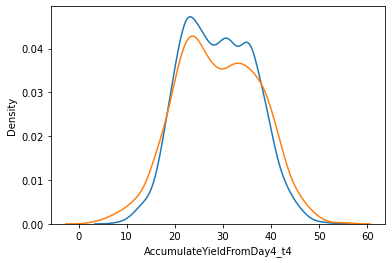

Imputation for var :  TenDaysAvgFat_KG_t7
X_train :  (3332, 79) 	y_train :  (3332,) 	X_test :  (3346, 79)
Number of missing values :  14


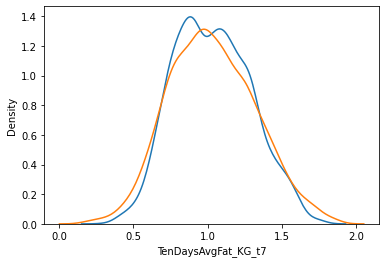

Imputation for var :  AccumulateECMFromDay4_KG_t7
X_train :  (3330, 80) 	y_train :  (3330,) 	X_test :  (3346, 80)
Number of missing values :  16


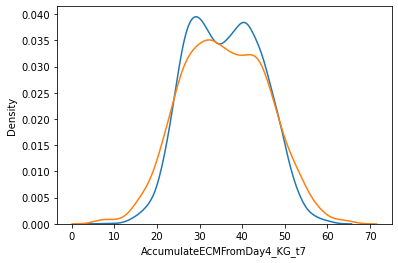

Imputation for var :  AccumulateYieldFromDay4_t7
X_train :  (3329, 81) 	y_train :  (3329,) 	X_test :  (3346, 81)
Number of missing values :  17


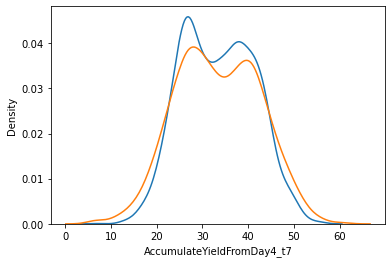

Imputation for var :  AccumulateYieldFromDay4_t5
X_train :  (3328, 82) 	y_train :  (3328,) 	X_test :  (3346, 82)
Number of missing values :  18


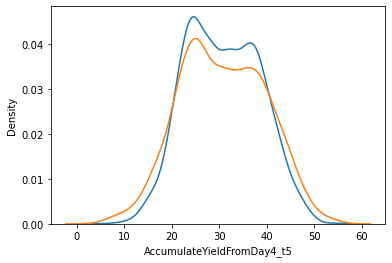

Imputation for var :  AccumulateProteinFromDay4_KG_t5
X_train :  (3328, 83) 	y_train :  (3328,) 	X_test :  (3346, 83)
Number of missing values :  18


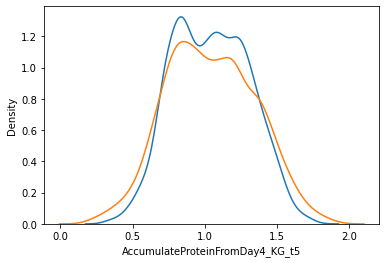

Imputation for var :  AccumulateFatFromDay4_KG_t6
X_train :  (3328, 84) 	y_train :  (3328,) 	X_test :  (3346, 84)
Number of missing values :  18


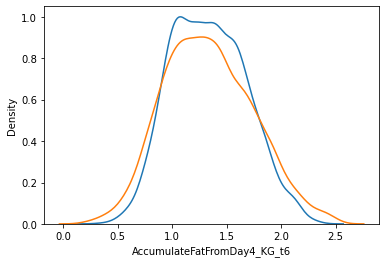

Imputation for var :  AccumulateECMFromDay4_KG_t4
X_train :  (3327, 85) 	y_train :  (3327,) 	X_test :  (3346, 85)
Number of missing values :  19


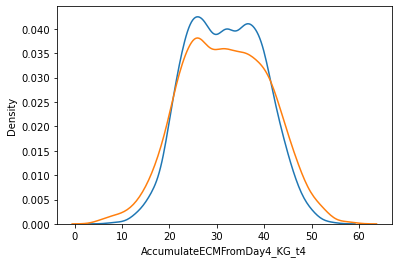

Imputation for var :  AccumulateECMFromDay4_KG_t5
X_train :  (3327, 86) 	y_train :  (3327,) 	X_test :  (3346, 86)
Number of missing values :  19


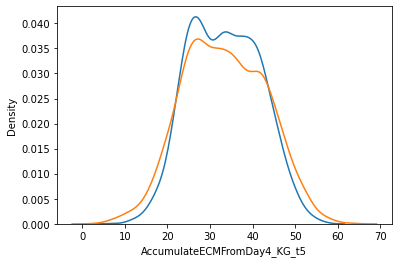

Imputation for var :  AccumulateProteinFromDay4_KG_t7
X_train :  (3327, 87) 	y_train :  (3327,) 	X_test :  (3346, 87)
Number of missing values :  19


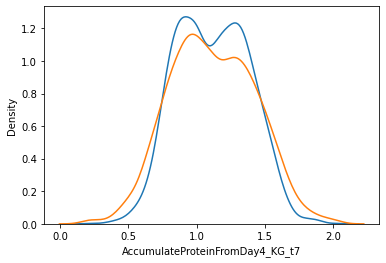

Imputation for var :  AccumulateFatFromDay4_KG_t4
X_train :  (3321, 88) 	y_train :  (3321,) 	X_test :  (3346, 88)
Number of missing values :  25


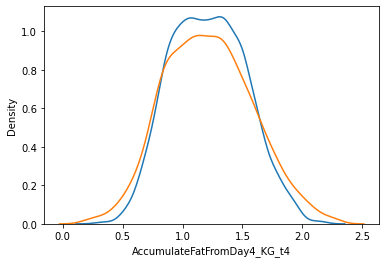

Imputation for var :  TenDaysAvgECM_KG
X_train :  (3319, 89) 	y_train :  (3319,) 	X_test :  (3346, 89)
Number of missing values :  27


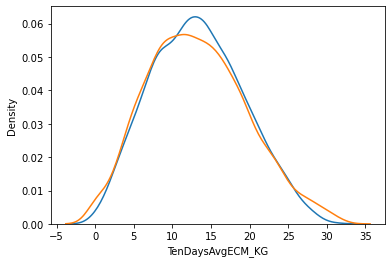

Imputation for var :  DailyFat_KG
X_train :  (3319, 90) 	y_train :  (3319,) 	X_test :  (3346, 90)
Number of missing values :  27


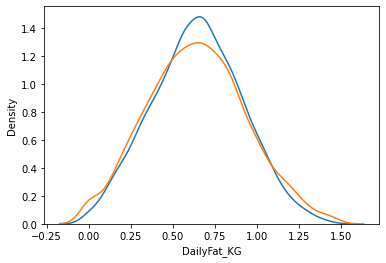

Imputation for var :  AccumulateFatFromDay4_KG_t7
X_train :  (3316, 91) 	y_train :  (3316,) 	X_test :  (3346, 91)
Number of missing values :  30


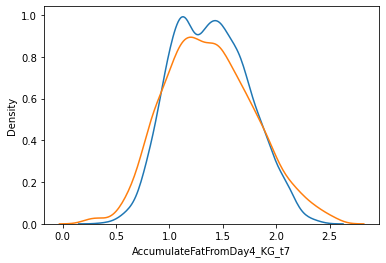

Imputation for var :  AccumulateFatFromDay4_KG_t5
X_train :  (3313, 92) 	y_train :  (3313,) 	X_test :  (3346, 92)
Number of missing values :  33


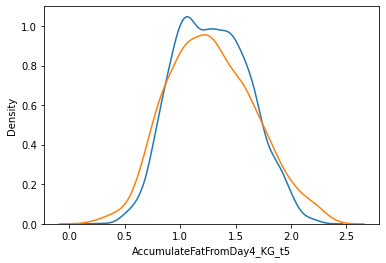

Imputation for var :  TenDaysAvgProtein_p_t7
X_train :  (3301, 93) 	y_train :  (3301,) 	X_test :  (3346, 93)
Number of missing values :  45


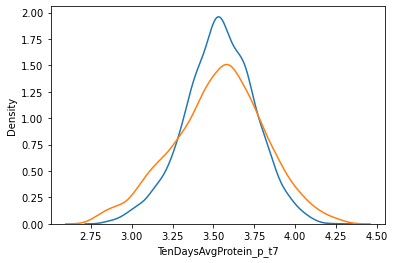

Imputation for var :  TenDaysAvgFPR_P_t7
X_train :  (3300, 94) 	y_train :  (3300,) 	X_test :  (3346, 94)
Number of missing values :  46


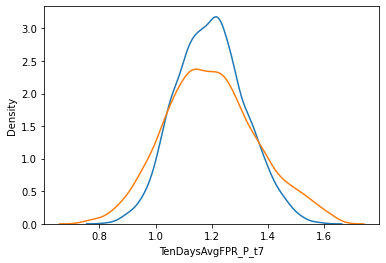

Imputation for var :  TenDaysAvgFat_P_t7
X_train :  (3282, 95) 	y_train :  (3282,) 	X_test :  (3346, 95)
Number of missing values :  64


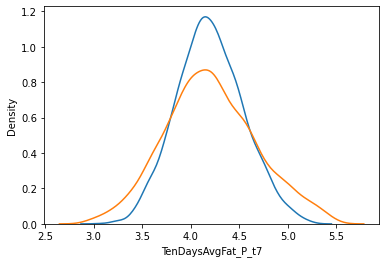

Imputation for var :  TenDaysAvgECM_KG_t4
X_train :  (3274, 96) 	y_train :  (3274,) 	X_test :  (3346, 96)
Number of missing values :  72


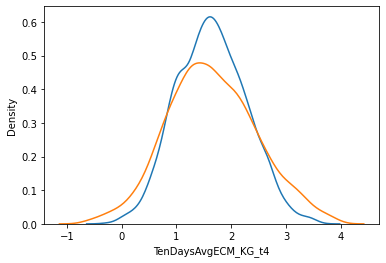

Imputation for var :  TenDaysAvgECM_KG_t5
X_train :  (3268, 97) 	y_train :  (3268,) 	X_test :  (3346, 97)
Number of missing values :  78


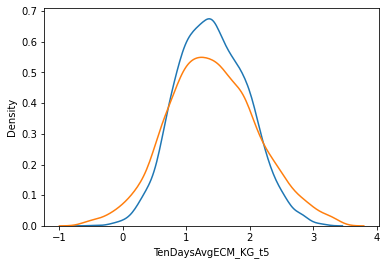

Imputation for var :  TenDaysAvgECM_KG_t1
X_train :  (3259, 98) 	y_train :  (3259,) 	X_test :  (3346, 98)
Number of missing values :  87


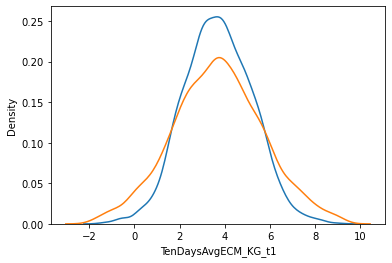

Imputation for var :  DailyFat_P
X_train :  (3258, 99) 	y_train :  (3258,) 	X_test :  (3346, 99)
Number of missing values :  88


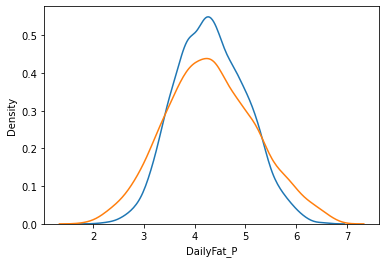

Imputation for var :  TenDaysAvgECM_KG_t2
X_train :  (3258, 100) 	y_train :  (3258,) 	X_test :  (3346, 100)
Number of missing values :  88


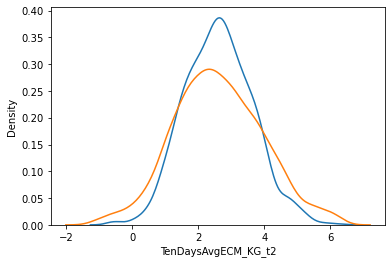

Imputation for var :  TenDaysAvgECM_KG_t6
X_train :  (3253, 101) 	y_train :  (3253,) 	X_test :  (3346, 101)
Number of missing values :  93


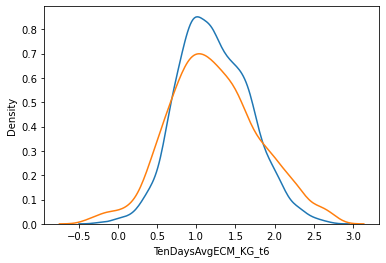

Imputation for var :  TenDaysAvgECM_KG_t3
X_train :  (3251, 102) 	y_train :  (3251,) 	X_test :  (3346, 102)
Number of missing values :  95


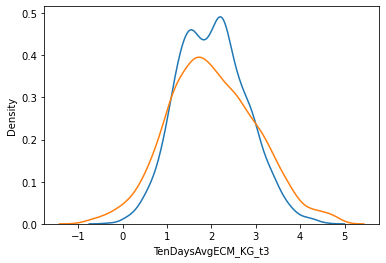

Imputation for var :  DailyFat_KG_t1
X_train :  (3240, 103) 	y_train :  (3240,) 	X_test :  (3346, 103)
Number of missing values :  106


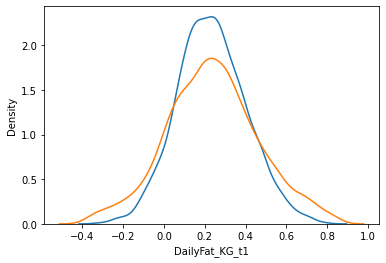

Imputation for var :  TenDaysAvgECM_KG_t7
X_train :  (3240, 104) 	y_train :  (3240,) 	X_test :  (3346, 104)
Number of missing values :  106


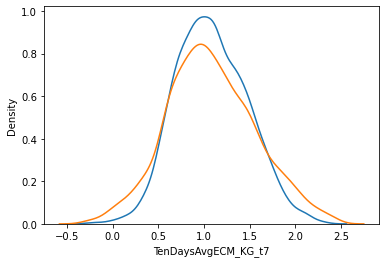

Imputation for var :  DailyFPR_P
X_train :  (3236, 105) 	y_train :  (3236,) 	X_test :  (3346, 105)
Number of missing values :  110


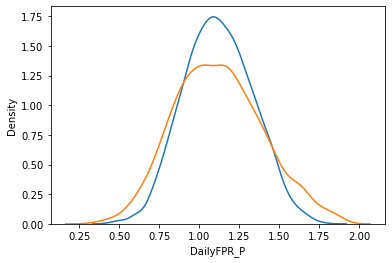

Imputation for var :  DailyRestRestlessness
X_train :  (3218, 106) 	y_train :  (3218,) 	X_test :  (3346, 106)
Number of missing values :  128


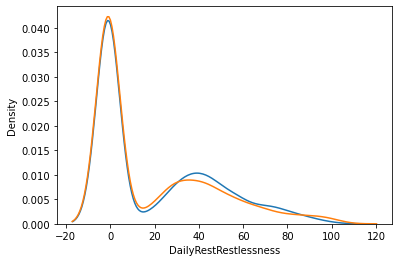

Imputation for var :  DailyFat_P_t1
X_train :  (3216, 107) 	y_train :  (3216,) 	X_test :  (3346, 107)
Number of missing values :  130


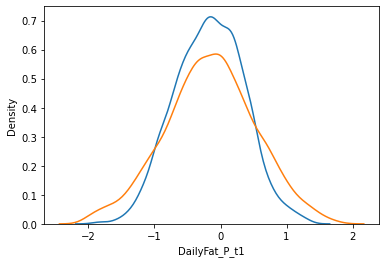

Imputation for var :  DailyYield_KG_t1
X_train :  (3206, 108) 	y_train :  (3206,) 	X_test :  (3346, 108)
Number of missing values :  140


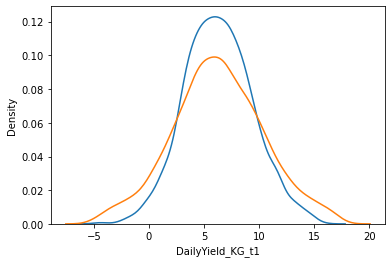

Imputation for var :  DailyProtein_P
X_train :  (3206, 109) 	y_train :  (3206,) 	X_test :  (3346, 109)
Number of missing values :  140


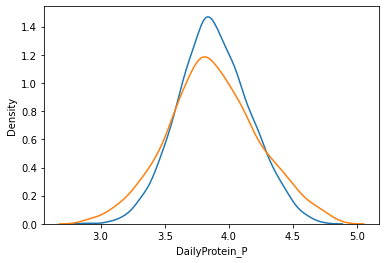

Imputation for var :  ECM_KG_t1
X_train :  (3205, 110) 	y_train :  (3205,) 	X_test :  (3346, 110)
Number of missing values :  141


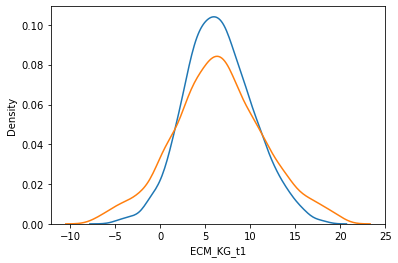

Imputation for var :  DailyFat_P_t2
X_train :  (3204, 111) 	y_train :  (3204,) 	X_test :  (3346, 111)
Number of missing values :  142


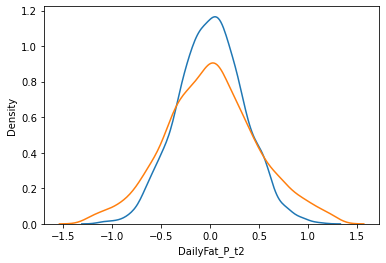

Imputation for var :  DailyProtein_KG_t1
X_train :  (3197, 112) 	y_train :  (3197,) 	X_test :  (3346, 112)
Number of missing values :  149


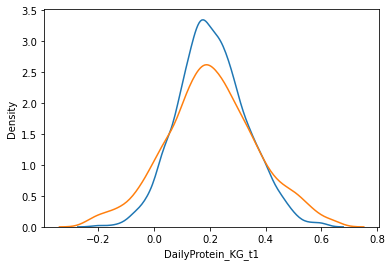

Imputation for var :  DailyFat_P_t3
X_train :  (3197, 113) 	y_train :  (3197,) 	X_test :  (3346, 113)
Number of missing values :  149


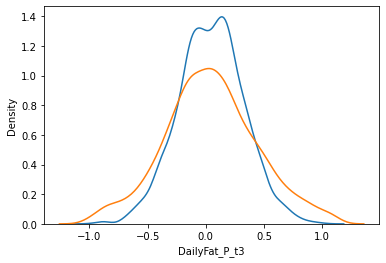

Imputation for var :  TenDaysAvgConductivity_t7
X_train :  (3195, 114) 	y_train :  (3195,) 	X_test :  (3346, 114)
Number of missing values :  151


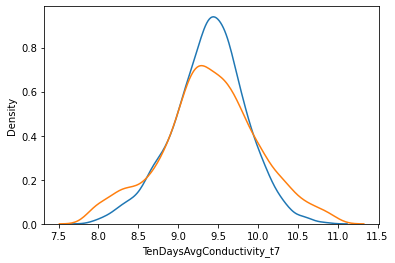

Imputation for var :  DailyFat_KG_t2
X_train :  (3190, 115) 	y_train :  (3190,) 	X_test :  (3346, 115)
Number of missing values :  156


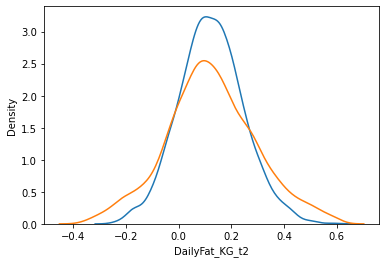

Imputation for var :  DailyProdRate_t1
X_train :  (3186, 116) 	y_train :  (3186,) 	X_test :  (3346, 116)
Number of missing values :  160


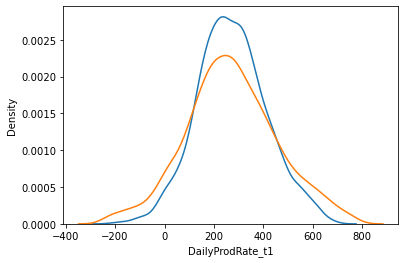

Imputation for var :  DailyFPR_P_t1
X_train :  (3181, 117) 	y_train :  (3181,) 	X_test :  (3346, 117)
Number of missing values :  165


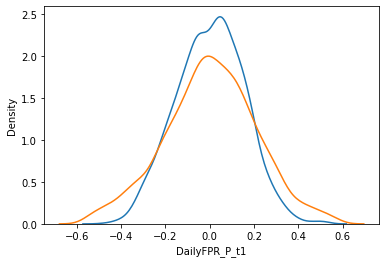

Imputation for var :  DailyFPR_P_t3
X_train :  (3177, 118) 	y_train :  (3177,) 	X_test :  (3346, 118)
Number of missing values :  169


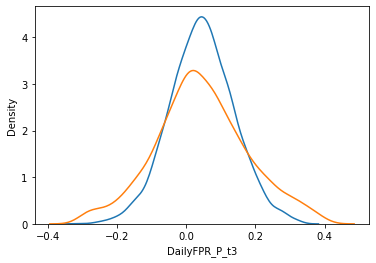

Imputation for var :  DailyFat_P_t4
X_train :  (3175, 119) 	y_train :  (3175,) 	X_test :  (3346, 119)
Number of missing values :  171


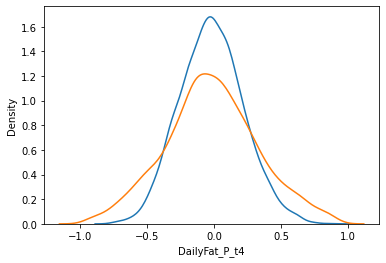

Imputation for var :  DailyFat_P_t6
X_train :  (3172, 120) 	y_train :  (3172,) 	X_test :  (3346, 120)
Number of missing values :  174


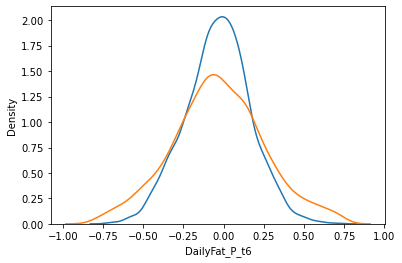

Imputation for var :  DailyConductivity_t2
X_train :  (3167, 121) 	y_train :  (3167,) 	X_test :  (3346, 121)
Number of missing values :  179


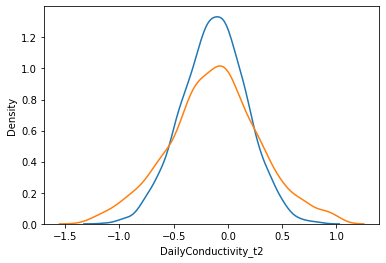

Imputation for var :  DailyActivity_t6
X_train :  (3162, 122) 	y_train :  (3162,) 	X_test :  (3346, 122)
Number of missing values :  184


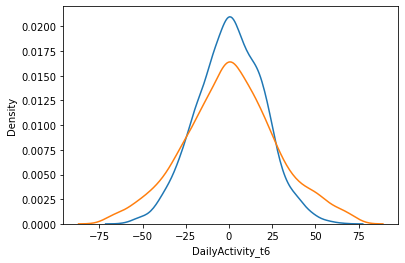

Imputation for var :  DailyFat_P_t5
X_train :  (3161, 123) 	y_train :  (3161,) 	X_test :  (3346, 123)
Number of missing values :  185


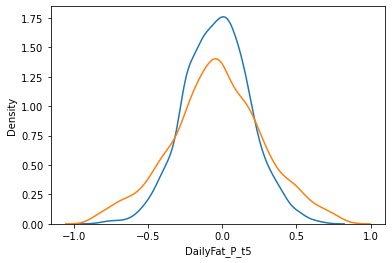

Imputation for var :  DailyConductivity
X_train :  (3161, 124) 	y_train :  (3161,) 	X_test :  (3346, 124)
Number of missing values :  185


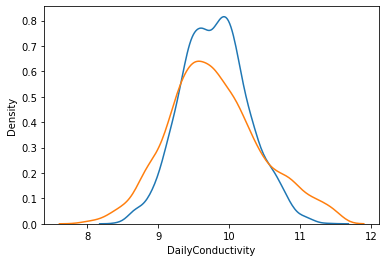

Imputation for var :  DailyProtein_P_t5
X_train :  (3158, 125) 	y_train :  (3158,) 	X_test :  (3346, 125)
Number of missing values :  188


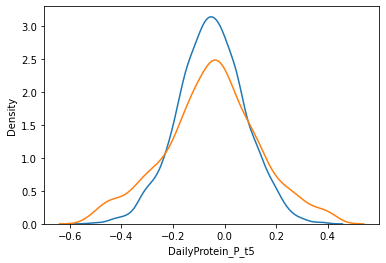

Imputation for var :  DailyMilkingTime
X_train :  (3156, 126) 	y_train :  (3156,) 	X_test :  (3346, 126)
Number of missing values :  190


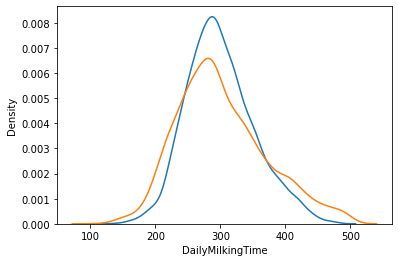

Imputation for var :  DailyFat_P_t7
X_train :  (3154, 127) 	y_train :  (3154,) 	X_test :  (3346, 127)
Number of missing values :  192


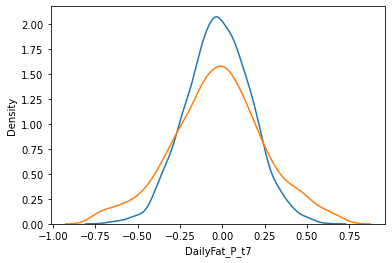

Imputation for var :  DailyActivity_t5
X_train :  (3154, 128) 	y_train :  (3154,) 	X_test :  (3346, 128)
Number of missing values :  192


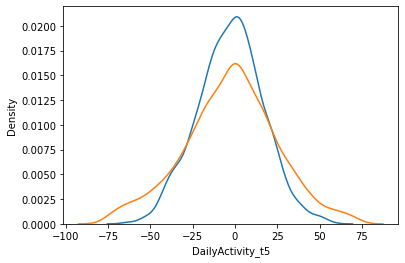

Imputation for var :  ECM_KG_t2
X_train :  (3153, 129) 	y_train :  (3153,) 	X_test :  (3346, 129)
Number of missing values :  193


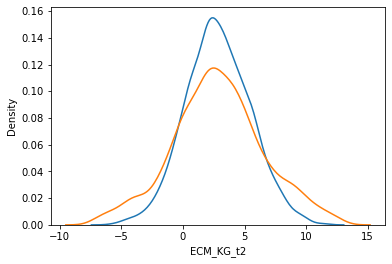

Imputation for var :  DailyProtein_KG_t5
X_train :  (3150, 130) 	y_train :  (3150,) 	X_test :  (3346, 130)
Number of missing values :  196


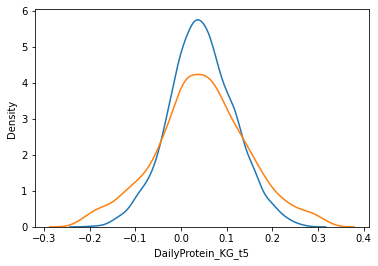

Imputation for var :  DailyConductivity_t1
X_train :  (3145, 131) 	y_train :  (3145,) 	X_test :  (3346, 131)
Number of missing values :  201


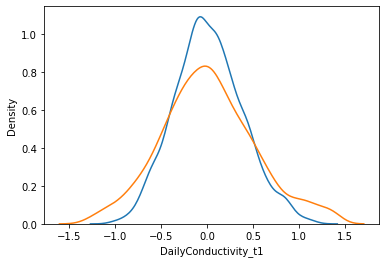

Imputation for var :  DailyFPR_P_t4
X_train :  (3144, 132) 	y_train :  (3144,) 	X_test :  (3346, 132)
Number of missing values :  202


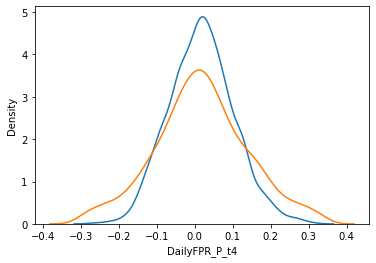

Imputation for var :  DailyFPR_P_t2
X_train :  (3143, 133) 	y_train :  (3143,) 	X_test :  (3346, 133)
Number of missing values :  203


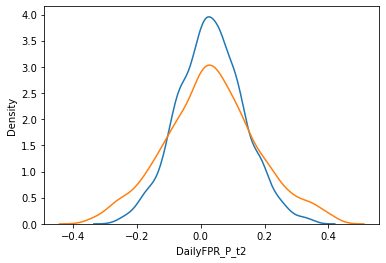

Imputation for var :  DailyFat_KG_t3
X_train :  (3140, 134) 	y_train :  (3140,) 	X_test :  (3346, 134)
Number of missing values :  206


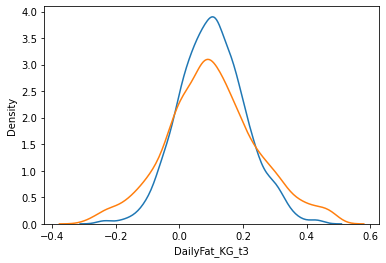

Imputation for var :  DailyProtein_P_t4
X_train :  (3138, 135) 	y_train :  (3138,) 	X_test :  (3346, 135)
Number of missing values :  208


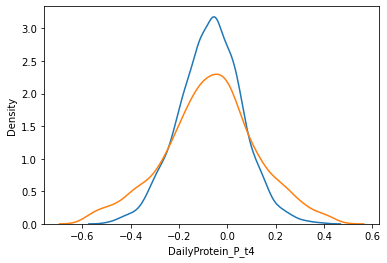

Imputation for var :  DailyProtein_KG_t2
X_train :  (3137, 136) 	y_train :  (3137,) 	X_test :  (3346, 136)
Number of missing values :  209


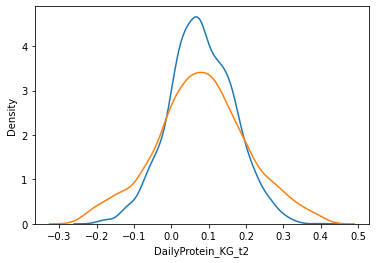

Imputation for var :  DailyFPR_P_t7
X_train :  (3136, 137) 	y_train :  (3136,) 	X_test :  (3346, 137)
Number of missing values :  210


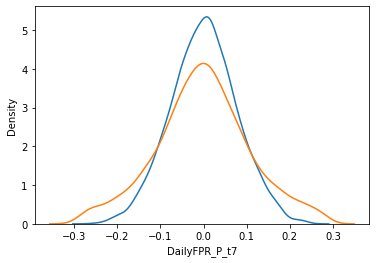

Imputation for var :  DailyProtein_P_t3
X_train :  (3135, 138) 	y_train :  (3135,) 	X_test :  (3346, 138)
Number of missing values :  211


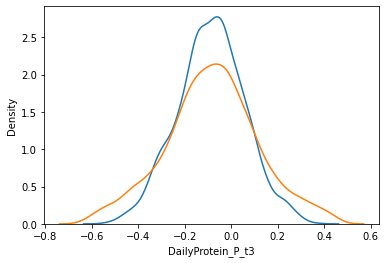

Imputation for var :  DailyActivity_t4
X_train :  (3135, 139) 	y_train :  (3135,) 	X_test :  (3346, 139)
Number of missing values :  211


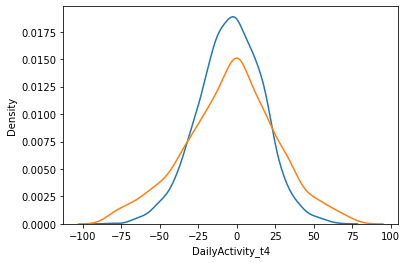

Imputation for var :  DailyConductivity_t6
X_train :  (3134, 140) 	y_train :  (3134,) 	X_test :  (3346, 140)
Number of missing values :  212


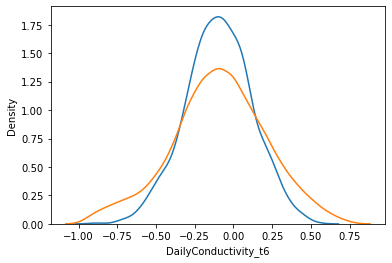

Imputation for var :  DailyYield_KG_t2
X_train :  (3132, 141) 	y_train :  (3132,) 	X_test :  (3346, 141)
Number of missing values :  214


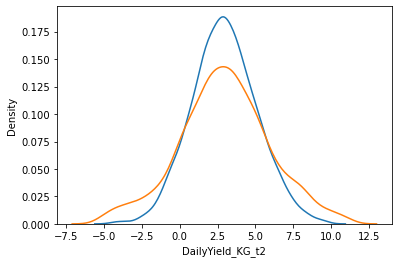

Imputation for var :  DailyFPR_P_t5
X_train :  (3132, 142) 	y_train :  (3132,) 	X_test :  (3346, 142)
Number of missing values :  214


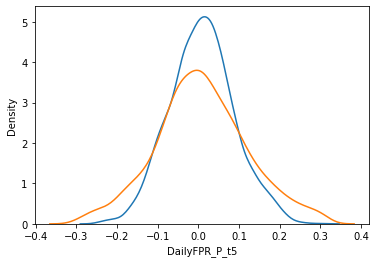

Imputation for var :  DailyProtein_P_t7
X_train :  (3130, 143) 	y_train :  (3130,) 	X_test :  (3346, 143)
Number of missing values :  216


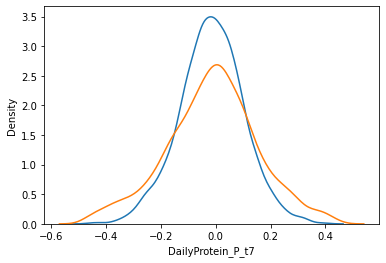

Imputation for var :  DailyProtein_P_t6
X_train :  (3129, 144) 	y_train :  (3129,) 	X_test :  (3346, 144)
Number of missing values :  217


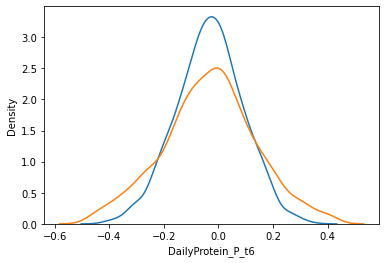

Imputation for var :  DailyHeatIndicator_t6
X_train :  (3128, 145) 	y_train :  (3128,) 	X_test :  (3346, 145)
Number of missing values :  218


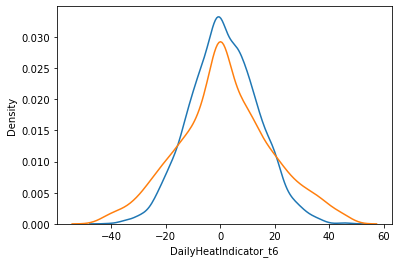

Imputation for var :  DailyFPR_P_t6
X_train :  (3128, 146) 	y_train :  (3128,) 	X_test :  (3346, 146)
Number of missing values :  218


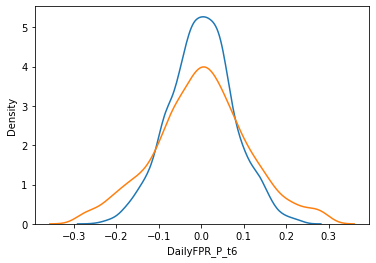

Imputation for var :  DailyProtein_KG_t4
X_train :  (3128, 147) 	y_train :  (3128,) 	X_test :  (3346, 147)
Number of missing values :  218


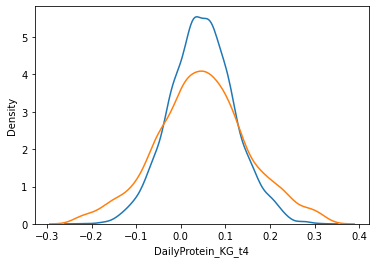

Imputation for var :  DailyConductivity_t7
X_train :  (3126, 148) 	y_train :  (3126,) 	X_test :  (3346, 148)
Number of missing values :  220


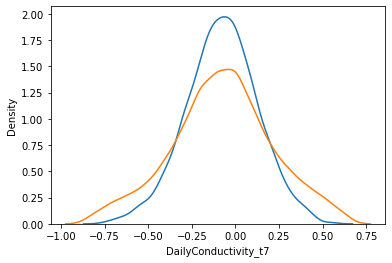

Imputation for var :  DailyProtein_KG_t7
X_train :  (3124, 149) 	y_train :  (3124,) 	X_test :  (3346, 149)
Number of missing values :  222


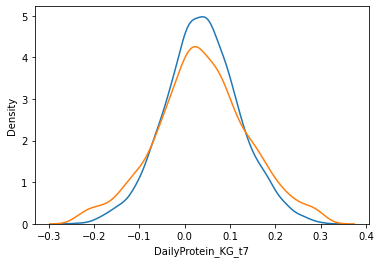

Imputation for var :  DailyProtein_P_t1
X_train :  (3124, 150) 	y_train :  (3124,) 	X_test :  (3346, 150)
Number of missing values :  222


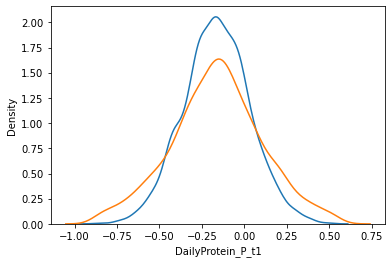

Imputation for var :  DailyProtein_KG_t3
X_train :  (3122, 151) 	y_train :  (3122,) 	X_test :  (3346, 151)
Number of missing values :  224


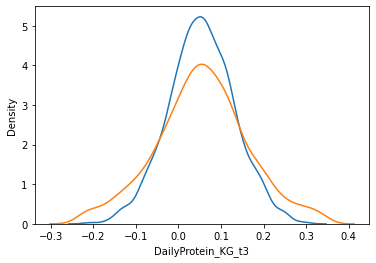

Imputation for var :  DailyProtein_KG_t6
X_train :  (3122, 152) 	y_train :  (3122,) 	X_test :  (3346, 152)
Number of missing values :  224


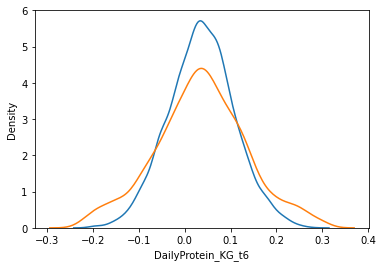

Imputation for var :  DailyFat_KG_t4
X_train :  (3119, 153) 	y_train :  (3119,) 	X_test :  (3346, 153)
Number of missing values :  227


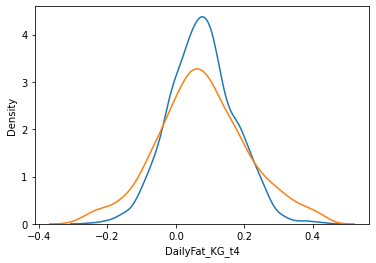

Imputation for var :  ECM_KG_t5
X_train :  (3117, 154) 	y_train :  (3117,) 	X_test :  (3346, 154)
Number of missing values :  229


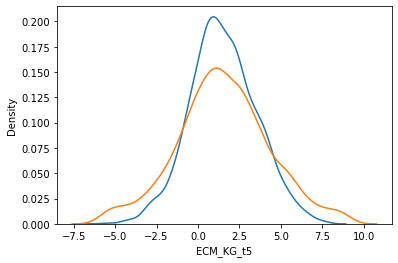

Imputation for var :  DailyYield_KG_t3
X_train :  (3116, 155) 	y_train :  (3116,) 	X_test :  (3346, 155)
Number of missing values :  230


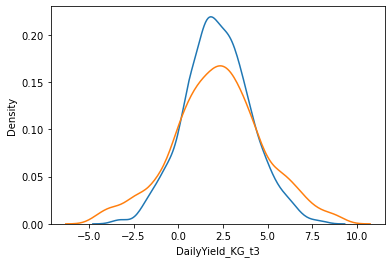

Imputation for var :  DailyConductivity_t5
X_train :  (3116, 156) 	y_train :  (3116,) 	X_test :  (3346, 156)
Number of missing values :  230


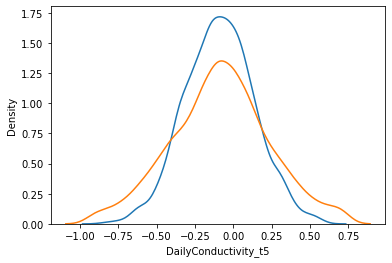

Imputation for var :  DailyYield_KG_t5
X_train :  (3113, 157) 	y_train :  (3113,) 	X_test :  (3346, 157)
Number of missing values :  233


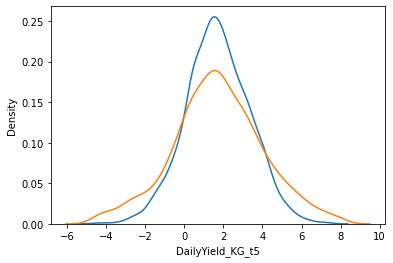

Imputation for var :  DailyYield_KG_t4
X_train :  (3112, 158) 	y_train :  (3112,) 	X_test :  (3346, 158)
Number of missing values :  234


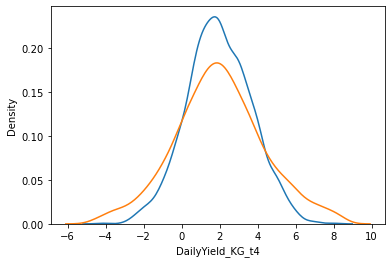

Imputation for var :  DailyProtein_P_t2
X_train :  (3111, 159) 	y_train :  (3111,) 	X_test :  (3346, 159)
Number of missing values :  235


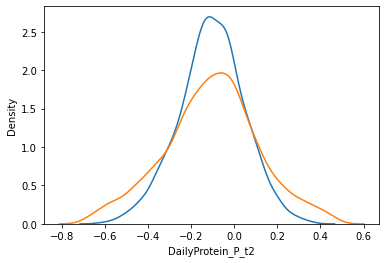

Imputation for var :  DailyFat_KG_t6
X_train :  (3108, 160) 	y_train :  (3108,) 	X_test :  (3346, 160)
Number of missing values :  238


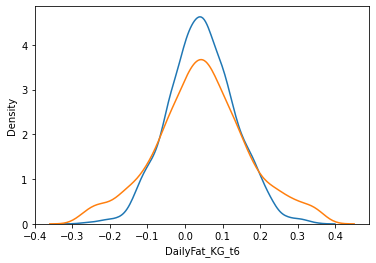

Imputation for var :  ECM_KG_t6
X_train :  (3100, 161) 	y_train :  (3100,) 	X_test :  (3346, 161)
Number of missing values :  246


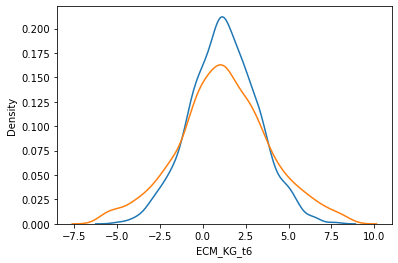

Imputation for var :  DailyFat_KG_t5
X_train :  (3095, 162) 	y_train :  (3095,) 	X_test :  (3346, 162)
Number of missing values :  251


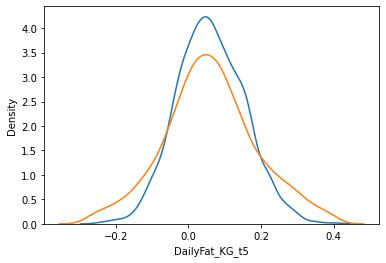

Imputation for var :  ECM_KG_t4
X_train :  (3092, 163) 	y_train :  (3092,) 	X_test :  (3346, 163)
Number of missing values :  254


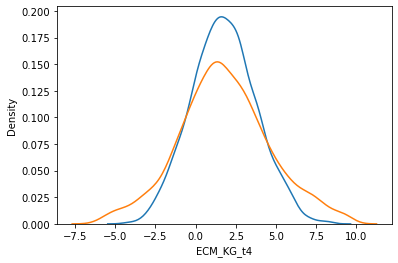

Imputation for var :  DailyConductivity_t4
X_train :  (3091, 164) 	y_train :  (3091,) 	X_test :  (3346, 164)
Number of missing values :  255


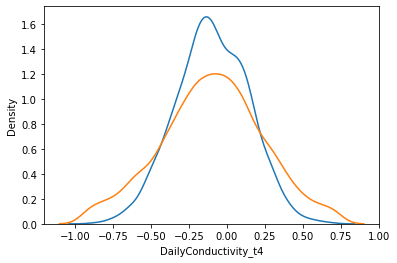

Imputation for var :  DailyYield_KG_t6
X_train :  (3090, 165) 	y_train :  (3090,) 	X_test :  (3346, 165)
Number of missing values :  256


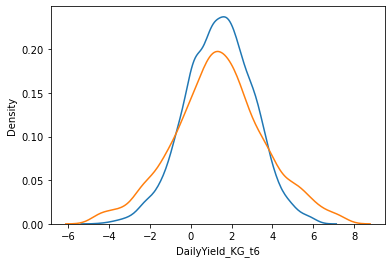

Imputation for var :  ECM_KG_t7
X_train :  (3090, 166) 	y_train :  (3090,) 	X_test :  (3346, 166)
Number of missing values :  256


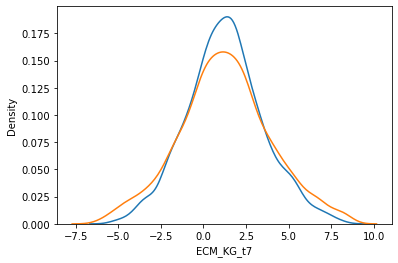

Imputation for var :  DailyProdRate_t2
X_train :  (3088, 167) 	y_train :  (3088,) 	X_test :  (3346, 167)
Number of missing values :  258


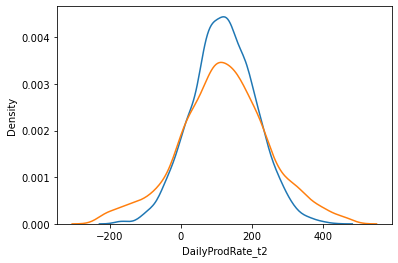

Imputation for var :  ECM_KG_t3
X_train :  (3088, 168) 	y_train :  (3088,) 	X_test :  (3346, 168)
Number of missing values :  258


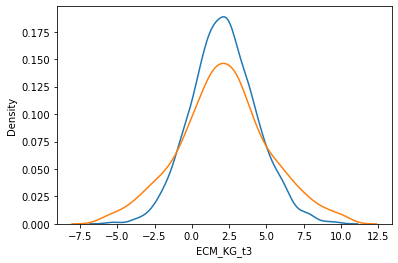

Imputation for var :  DailyYield_KG_t7
X_train :  (3086, 169) 	y_train :  (3086,) 	X_test :  (3346, 169)
Number of missing values :  260


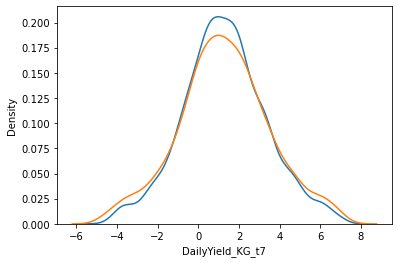

Imputation for var :  DailyActivity_t3
X_train :  (3085, 170) 	y_train :  (3085,) 	X_test :  (3346, 170)
Number of missing values :  261


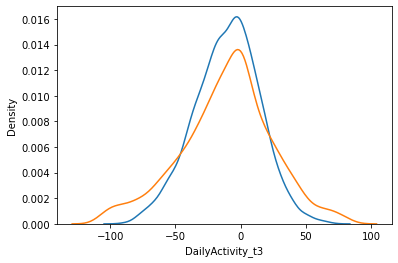

Imputation for var :  DailyFat_KG_t7
X_train :  (3080, 171) 	y_train :  (3080,) 	X_test :  (3346, 171)
Number of missing values :  266


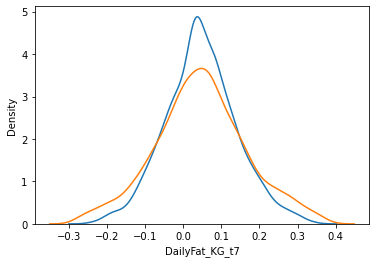

Imputation for var :  DailyProdRate_t3
X_train :  (3076, 172) 	y_train :  (3076,) 	X_test :  (3346, 172)
Number of missing values :  270


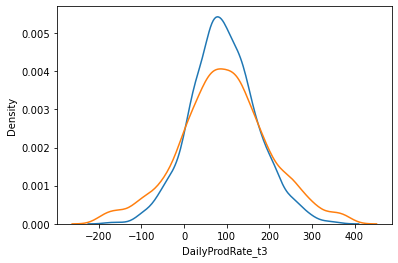

Imputation for var :  DailyProdRate_t5
X_train :  (3075, 173) 	y_train :  (3075,) 	X_test :  (3346, 173)
Number of missing values :  271


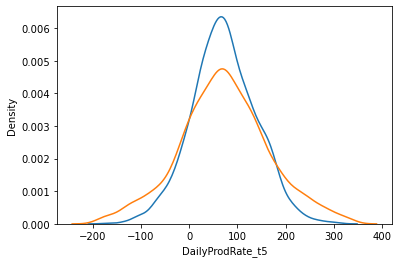

Imputation for var :  DailyProdRate_t4
X_train :  (3071, 174) 	y_train :  (3071,) 	X_test :  (3346, 174)
Number of missing values :  275


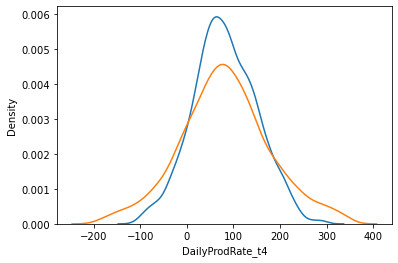

Imputation for var :  DailyActivity_t1
X_train :  (3068, 175) 	y_train :  (3068,) 	X_test :  (3346, 175)
Number of missing values :  278


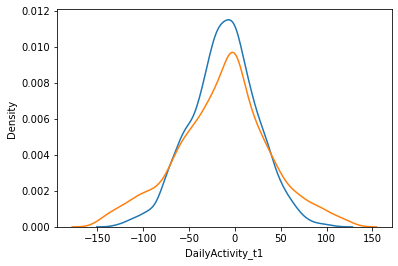

Imputation for var :  DailyMilkingTime_t3
X_train :  (3064, 176) 	y_train :  (3064,) 	X_test :  (3346, 176)
Number of missing values :  282


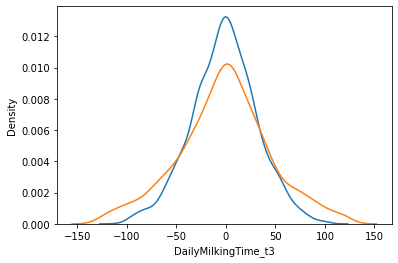

Imputation for var :  DailyActivity_t2
X_train :  (3064, 177) 	y_train :  (3064,) 	X_test :  (3346, 177)
Number of missing values :  282


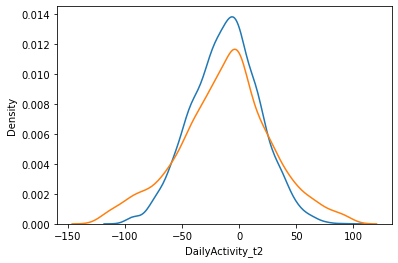

Imputation for var :  DailyMilkingTime_t6
X_train :  (3054, 178) 	y_train :  (3054,) 	X_test :  (3346, 178)
Number of missing values :  292


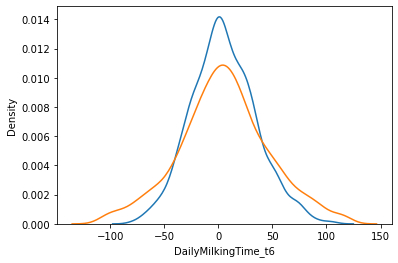

Imputation for var :  DailyMilkingTime_t4
X_train :  (3049, 179) 	y_train :  (3049,) 	X_test :  (3346, 179)
Number of missing values :  297


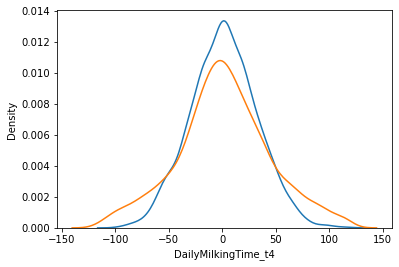

Imputation for var :  DailyProdRate_t6
X_train :  (3047, 180) 	y_train :  (3047,) 	X_test :  (3346, 180)
Number of missing values :  299


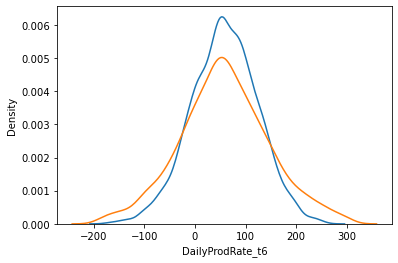

Imputation for var :  DailyConductivity_t3
X_train :  (3037, 181) 	y_train :  (3037,) 	X_test :  (3346, 181)
Number of missing values :  309


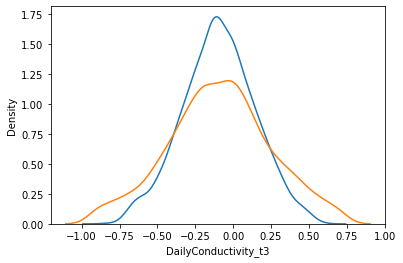

Imputation for var :  DailyMilkingTime_t5
X_train :  (3035, 182) 	y_train :  (3035,) 	X_test :  (3346, 182)
Number of missing values :  311


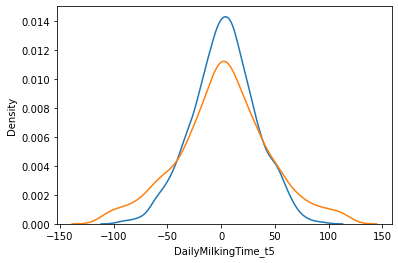

Imputation for var :  DailyMilkingTime_t1
X_train :  (3028, 183) 	y_train :  (3028,) 	X_test :  (3346, 183)
Number of missing values :  318


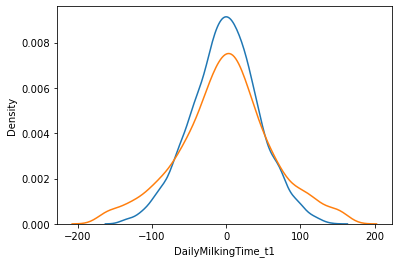

Imputation for var :  DailyMilkingTime_t2
X_train :  (3028, 184) 	y_train :  (3028,) 	X_test :  (3346, 184)
Number of missing values :  318


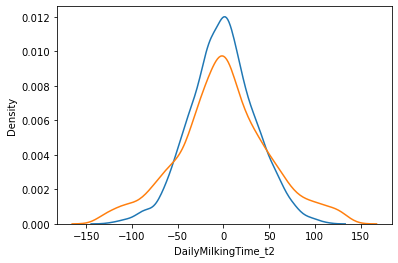

Imputation for var :  LastEdma_t1_t30
X_train :  (3346, 185) 	y_train :  (3346,) 	X_test :  (3346, 185)
Number of missing values :  0


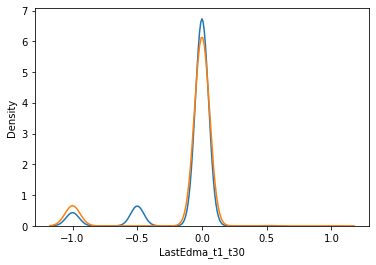

Imputation for var :  LastLAME_t1_t30
X_train :  (3346, 186) 	y_train :  (3346,) 	X_test :  (3346, 186)
Number of missing values :  0


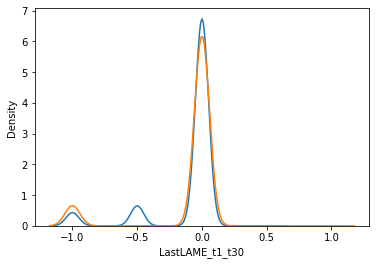

Imputation for var :  LastKET_t1_t30
X_train :  (3346, 187) 	y_train :  (3346,) 	X_test :  (3346, 187)
Number of missing values :  0


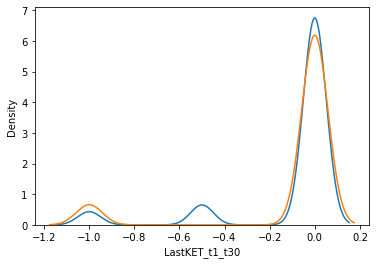

Imputation for var :  LastPRO_t1_t30
X_train :  (3346, 188) 	y_train :  (3346,) 	X_test :  (3346, 188)
Number of missing values :  0


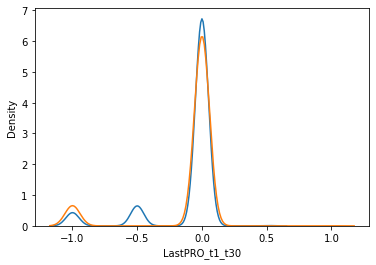

Imputation for var :  LastLDA_t1_t30
X_train :  (3346, 189) 	y_train :  (3346,) 	X_test :  (3346, 189)
Number of missing values :  0


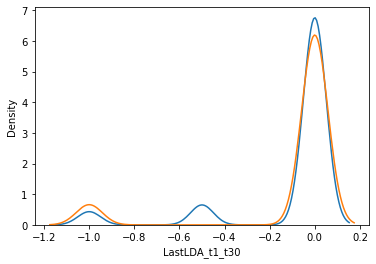

Imputation for var :  LastMAST_t1_t30
X_train :  (3346, 190) 	y_train :  (3346,) 	X_test :  (3346, 190)
Number of missing values :  0


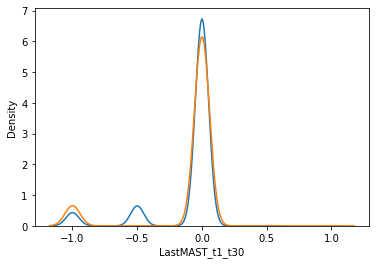

Imputation for var :  LastMF_t1_t30
X_train :  (3346, 191) 	y_train :  (3346,) 	X_test :  (3346, 191)
Number of missing values :  0


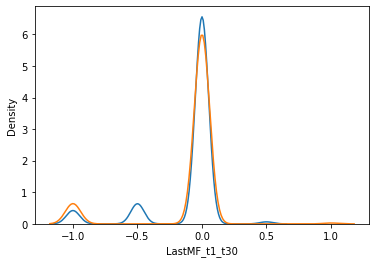

Imputation for var :  DailyHeatIndicator_t5
X_train :  (3020, 192) 	y_train :  (3020,) 	X_test :  (3346, 192)
Number of missing values :  326


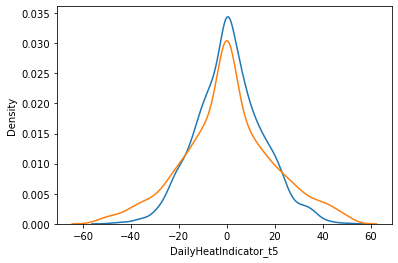

Imputation for var :  DailyActivity
X_train :  (2974, 193) 	y_train :  (2974,) 	X_test :  (3346, 193)
Number of missing values :  372


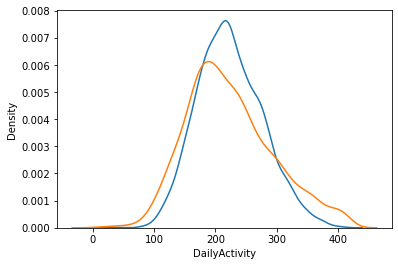

Imputation for var :  DailyHeatIndicator_t1
X_train :  (2849, 194) 	y_train :  (2849,) 	X_test :  (3346, 194)
Number of missing values :  497


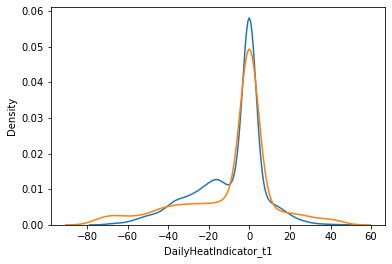

Imputation for var :  DailyHeatIndicator
X_train :  (2802, 195) 	y_train :  (2802,) 	X_test :  (3346, 195)
Number of missing values :  544


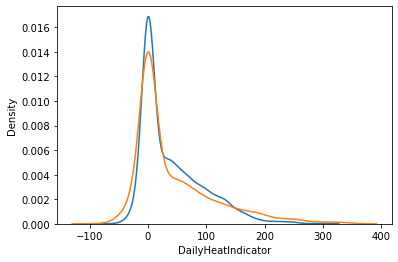

Imputation for var :  DailyHeatIndicator_t3
X_train :  (2785, 196) 	y_train :  (2785,) 	X_test :  (3346, 196)
Number of missing values :  561


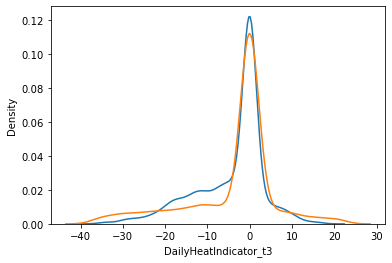

Imputation for var :  DailyRestBout_t6
X_train :  (2781, 197) 	y_train :  (2781,) 	X_test :  (3346, 197)
Number of missing values :  565


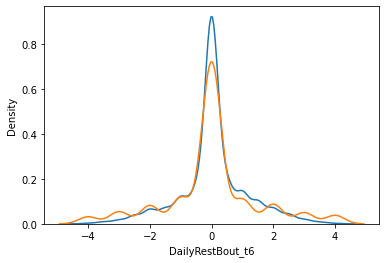

Imputation for var :  DIM
X_train :  (2779, 198) 	y_train :  (2779,) 	X_test :  (3346, 198)
Number of missing values :  567


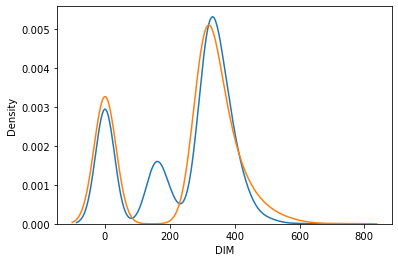

Imputation for var :  CurrentDryDays
X_train :  (2779, 199) 	y_train :  (2779,) 	X_test :  (3346, 199)
Number of missing values :  567


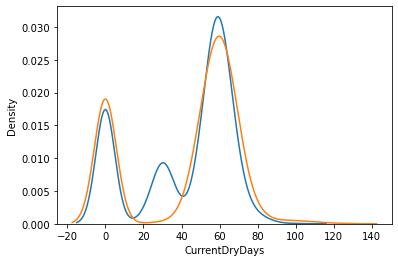

Imputation for var :  Fertility_Num
X_train :  (2779, 200) 	y_train :  (2779,) 	X_test :  (3346, 200)
Number of missing values :  567


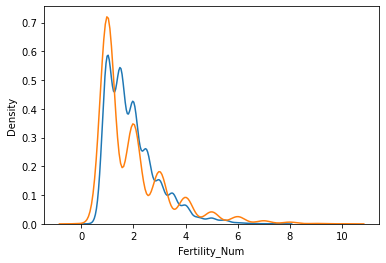

Imputation for var :  DailyRestBout_t3
X_train :  (2758, 201) 	y_train :  (2758,) 	X_test :  (3346, 201)
Number of missing values :  588


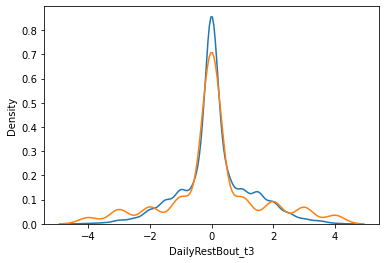

Imputation for var :  DailyHeatIndicator_t2
X_train :  (2756, 202) 	y_train :  (2756,) 	X_test :  (3346, 202)
Number of missing values :  590


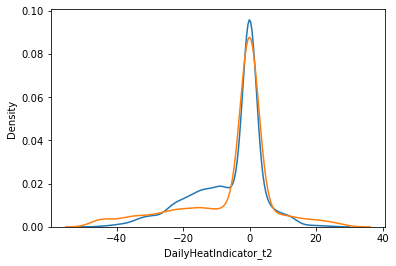

Imputation for var :  DailyRestBout_t5
X_train :  (2756, 203) 	y_train :  (2756,) 	X_test :  (3346, 203)
Number of missing values :  590


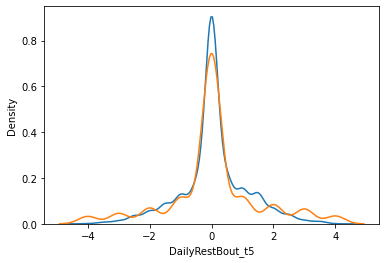

Imputation for var :  DailyRestBout_t2
X_train :  (2740, 204) 	y_train :  (2740,) 	X_test :  (3346, 204)
Number of missing values :  606


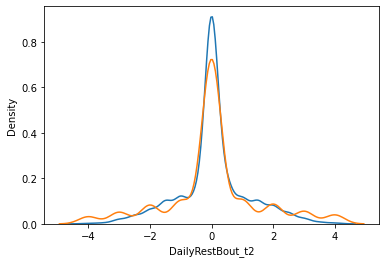

Imputation for var :  DailyHeatIndicator_t4
X_train :  (2721, 205) 	y_train :  (2721,) 	X_test :  (3346, 205)
Number of missing values :  625


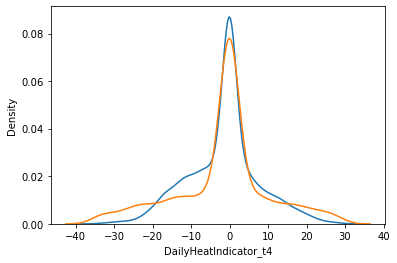

Imputation for var :  DailyRestRatio_t5
X_train :  (2620, 206) 	y_train :  (2620,) 	X_test :  (3346, 206)
Number of missing values :  726


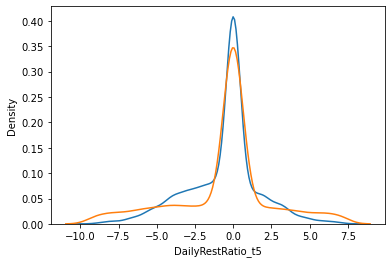

Imputation for var :  DailyRestRatio_t6
X_train :  (2612, 207) 	y_train :  (2612,) 	X_test :  (3346, 207)
Number of missing values :  734


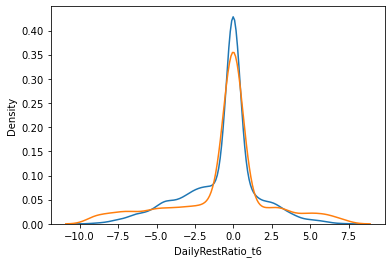

Imputation for var :  DailyRestRatio_t3
X_train :  (2572, 208) 	y_train :  (2572,) 	X_test :  (3346, 208)
Number of missing values :  774


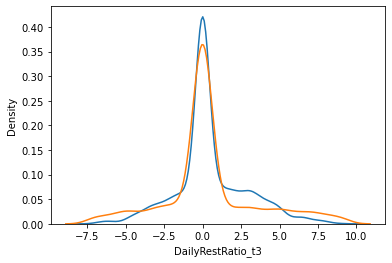

Imputation for var :  DailyRestPerBout_t4
X_train :  (2525, 209) 	y_train :  (2525,) 	X_test :  (3346, 209)
Number of missing values :  821


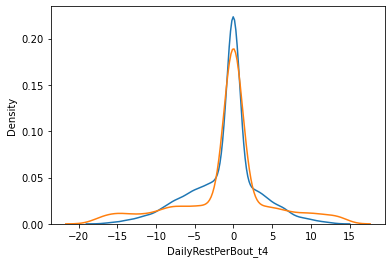

Imputation for var :  DailyRestTime_t2
X_train :  (2510, 210) 	y_train :  (2510,) 	X_test :  (3346, 210)
Number of missing values :  836


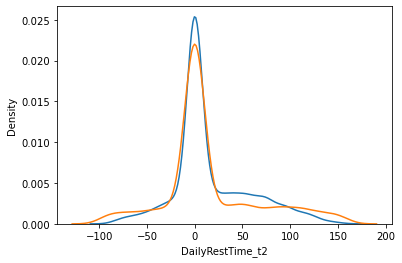

Imputation for var :  DailyRestTime_t4
X_train :  (2502, 211) 	y_train :  (2502,) 	X_test :  (3346, 211)
Number of missing values :  844


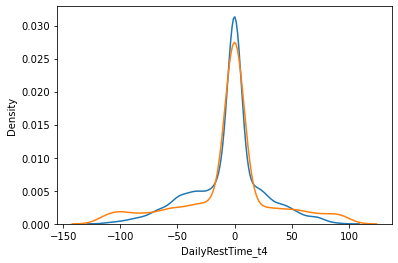

Imputation for var :  DailyRestRestlessness_t2
X_train :  (2502, 212) 	y_train :  (2502,) 	X_test :  (3346, 212)
Number of missing values :  844


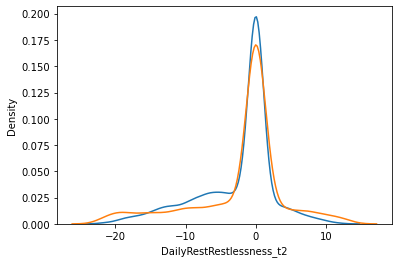

Imputation for var :  DailyRestTime_t5
X_train :  (2493, 213) 	y_train :  (2493,) 	X_test :  (3346, 213)
Number of missing values :  853


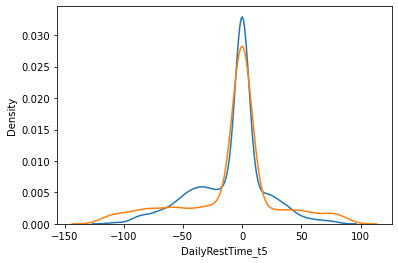

Imputation for var :  DailyRestTime_t3
X_train :  (2491, 214) 	y_train :  (2491,) 	X_test :  (3346, 214)
Number of missing values :  855


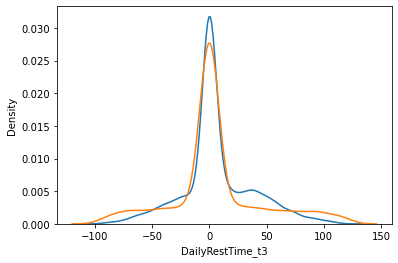

Imputation for var :  DailyRestRatio_t2
X_train :  (2481, 215) 	y_train :  (2481,) 	X_test :  (3346, 215)
Number of missing values :  865


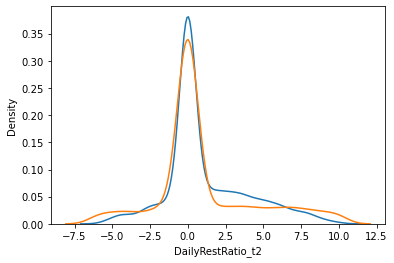

Imputation for var :  DailyRestPerBout_t6
X_train :  (2478, 216) 	y_train :  (2478,) 	X_test :  (3346, 216)
Number of missing values :  868


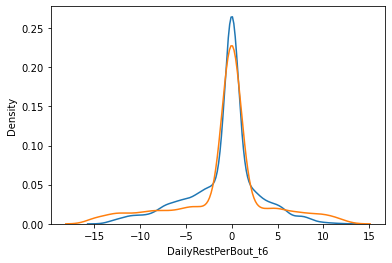

Imputation for var :  DailyRestBout_t1
X_train :  (2477, 217) 	y_train :  (2477,) 	X_test :  (3346, 217)
Number of missing values :  869


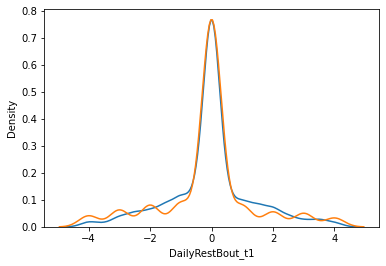

Imputation for var :  DailyRestPerBout_t5
X_train :  (2429, 218) 	y_train :  (2429,) 	X_test :  (3346, 218)
Number of missing values :  917


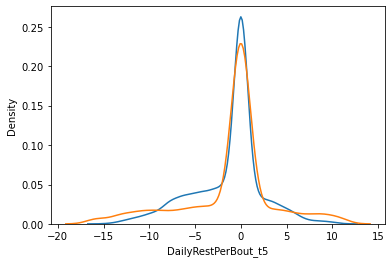

Imputation for var :  DailyRestRestlessness_t6
X_train :  (2427, 219) 	y_train :  (2427,) 	X_test :  (3346, 219)
Number of missing values :  919


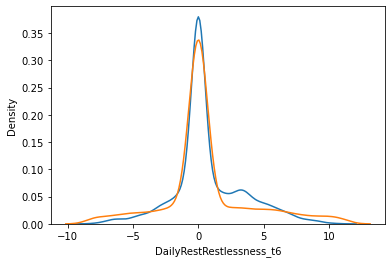

Imputation for var :  DailyRestPerBout_t3
X_train :  (2422, 220) 	y_train :  (2422,) 	X_test :  (3346, 220)
Number of missing values :  924


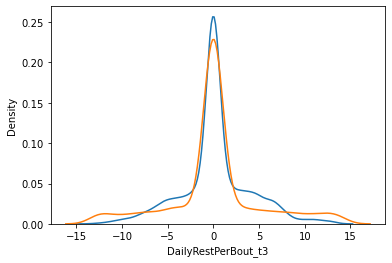

Imputation for var :  DailyRestTime_t6
X_train :  (2420, 221) 	y_train :  (2420,) 	X_test :  (3346, 221)
Number of missing values :  926


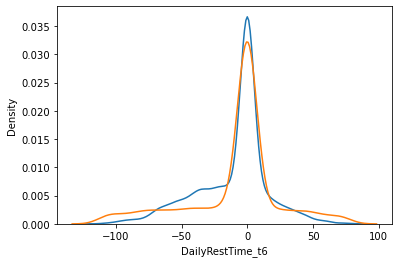

Imputation for var :  DailyRestRestlessness_t5
X_train :  (2411, 222) 	y_train :  (2411,) 	X_test :  (3346, 222)
Number of missing values :  935


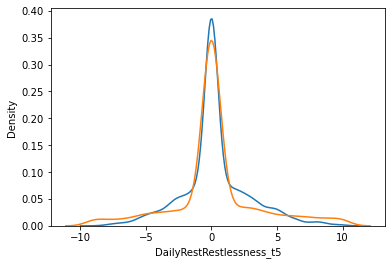

Imputation for var :  DailyRestPerBout_t2
X_train :  (2397, 223) 	y_train :  (2397,) 	X_test :  (3346, 223)
Number of missing values :  949


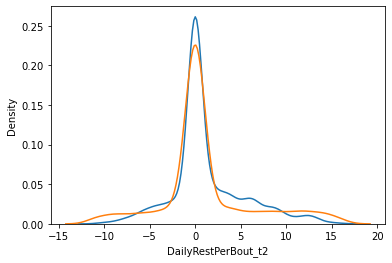

Imputation for var :  DailyRestRatio_t4
X_train :  (2332, 224) 	y_train :  (2332,) 	X_test :  (3346, 224)
Number of missing values :  1014


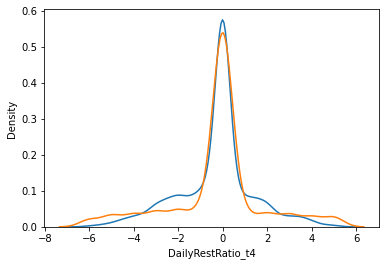

Imputation for var :  DailyRestRestlessness_t3
X_train :  (2325, 225) 	y_train :  (2325,) 	X_test :  (3346, 225)
Number of missing values :  1021


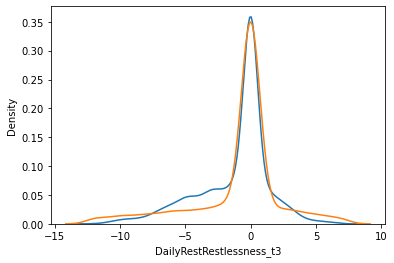

Imputation for var :  DailyRestRestlessness_t4
X_train :  (2312, 226) 	y_train :  (2312,) 	X_test :  (3346, 226)
Number of missing values :  1034


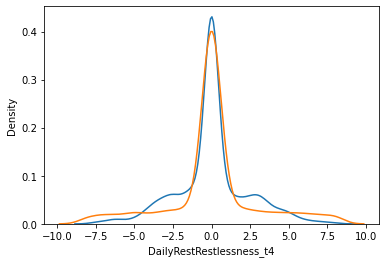

Imputation for var :  DailyRestBout_t4
X_train :  (2220, 227) 	y_train :  (2220,) 	X_test :  (3346, 227)
Number of missing values :  1126


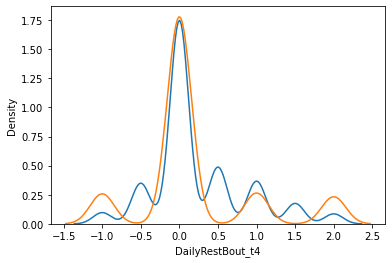

Imputation for var :  DailyRestRestlessness_t1
X_train :  (2217, 228) 	y_train :  (2217,) 	X_test :  (3346, 228)
Number of missing values :  1129


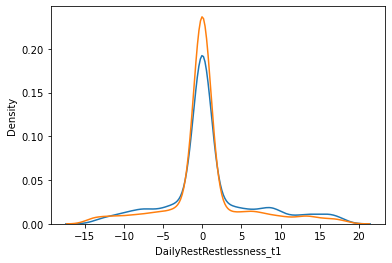

Imputation complete !!!


In [125]:

df_imp = pd.DataFrame()
imputation_results = []

df_imp = df_wo_missing[(missing_rate['var'][missing_rate['rate'] == 0])]
df_imp = df_imp.select_dtypes(exclude = ['object'])

columns_to_imp = missing_rate[missing_rate['rate'] > 0].sort_values("rate", ascending=True).reset_index()['var']
i=0
for col in columns_to_imp:
    print('Imputation for var : ', col)
    ##
    df_imp[col] = df_wo_missing[col]
    ##
    X_train = df_imp[df_imp[col].isnull() == False]
    X_train = X_train.drop(col, axis=1)
    ##
    y_train = df_imp[df_imp[col].isnull() == False][col]
    ##
    X_test = df_imp.drop(col, axis=1)
    ##
    print('X_train : ', X_train.shape, '\ty_train : ', y_train.shape, '\tX_test : ', X_test.shape)
    print('Number of missing values : ', len(X_test) - len(X_train) )
    ## find the best k in the first iteration 
    if i == 0:
        k = get_best_K(X_train, y_train, 20)
        i = 1
    mod = KNeighborsRegressor(k).fit(X_train,y_train)
    y_pred = pd.DataFrame(mod.predict(X_test), index=X_test.index, columns=[col])
    ##
    df_imp = pd.merge(df_imp, y_pred, left_index=True, right_index=True, left_on=df_imp.index, suffixes='oi')
    ## 
    old_col = col + 'o'
    new_col = col + 'i'
    ### Check the corelation between the old column and the imputed one
    sp_df = pd.DataFrame()
    sp_df = df_imp[[new_col,old_col]]
    sp_df = sp_df.dropna()
    sp =  spearmanr(sp_df[new_col], sp_df[old_col])
    imputation_result = []
    imputation_result = {'var'         : col,
                         'na_count'    : len(X_test) - len(X_train),
                         'correlation' : sp[0],
                         'P_value'     : sp[1]}    
    imputation_results.append(imputation_result)
    ###
    sns.distplot(df_imp[new_col], hist=False)
    sns.distplot(df_wo_missing[col].dropna(), hist=False)
    plt.show()
    ###
    df_imp = df_imp.drop(old_col, axis= 1)
###
print('Imputation complete !!!')
imputation_results = pd.DataFrame(imputation_results)

## TODO: add handle of category and ordinary vars with KNeighborsClassifier 

In [100]:
imputation_results

var  na_count  correlation        P_value
0         AccumulateYieldFromDay4_t4        13     0.867685   0.000000e+00
1                TenDaysAvgFat_KG_t7        14     0.891385   0.000000e+00
2        AccumulateECMFromDay4_KG_t7        16     0.873149   0.000000e+00
3         AccumulateYieldFromDay4_t7        17     0.877996   0.000000e+00
4         AccumulateYieldFromDay4_t5        18     0.869781   0.000000e+00
5    AccumulateProteinFromDay4_KG_t5        18     0.858808   0.000000e+00
6        AccumulateFatFromDay4_KG_t6        18     0.850062   0.000000e+00
7        AccumulateECMFromDay4_KG_t4        19     0.865708   0.000000e+00
8        AccumulateECMFromDay4_KG_t5        19     0.869629   0.000000e+00
9    AccumulateProteinFromDay4_KG_t7        19     0.865177   0.000000e+00
10       AccumulateFatFromDay4_KG_t4        25     0.854193   0.000000e+00
11                  TenDaysAvgECM_KG        27     0.937505   0.000000e+00
12                       DailyFat_KG        27     0.924963   0.000000e+00
13       AccumulateFatFromDay4_KG_t7        30     0.854876   0.000000e+00
14       AccumulateFatFromDay4_KG_t5        33     0.853129   0.000000e+00
15            TenDaysAvgProtein_p_t7        45     0.757968   0.000000e+00
16                TenDaysAvgFPR_P_t7        46     0.738154   0.000000e+00
17                TenDaysAvgFat_P_t7        64     0.726483   0.000000e+00
18               TenDaysAvgECM_KG_t4        72     0.780795   0.000000e+00
19               TenDaysAvgECM_KG_t5        78     0.780991   0.000000e+00
20               TenDaysAvgECM_KG_t1        87     0.754278   0.000000e+00
21                        DailyFat_P        88     0.773793   0.000000e+00
22               TenDaysAvgECM_KG_t2        88     0.757438   0.000000e+00
23               TenDaysAvgECM_KG_t6        93     0.795307   0.000000e+00
24               TenDaysAvgECM_KG_t3        95     0.771204   0.000000e+00
25                    DailyFat_KG_t1       106     0.749964   0.000000e+00
26               TenDaysAvgECM_KG_t7       106     0.810438   0.000000e+00
27                        DailyFPR_P       110     0.779211   0.000000e+00
28             DailyRestRestlessness       128     0.985316   0.000000e+00
29                     DailyFat_P_t1       130     0.758216   0.000000e+00
30                  DailyYield_KG_t1       140     0.744443   0.000000e+00
31                    DailyProtein_P       140     0.761300   0.000000e+00
32                         ECM_KG_t1       141     0.747542   0.000000e+00
33                     DailyFat_P_t2       142     0.721911   0.000000e+00
34                DailyProtein_KG_t1       149     0.748176   0.000000e+00
35                     DailyFat_P_t3       149     0.695703   0.000000e+00
36         TenDaysAvgConductivity_t7       151     0.743657   0.000000e+00
37                    DailyFat_KG_t2       156     0.717373   0.000000e+00
38                  DailyProdRate_t1       160     0.758635   0.000000e+00
39                     DailyFPR_P_t1       165     0.748872   0.000000e+00
40                     DailyFPR_P_t3       169     0.678647   0.000000e+00
41                     DailyFat_P_t4       171     0.690572   0.000000e+00
42                     DailyFat_P_t6       174     0.692870   0.000000e+00
43              DailyConductivity_t2       179     0.692921   0.000000e+00
44                  DailyActivity_t6       184     0.715929   0.000000e+00
45                     DailyFat_P_t5       185     0.705523   0.000000e+00
46                 DailyConductivity       185     0.708538   0.000000e+00
47                 DailyProtein_P_t5       188     0.694606   0.000000e+00
48                  DailyMilkingTime       190     0.746601   0.000000e+00
49                     DailyFat_P_t7       192     0.693459   0.000000e+00
50                  DailyActivity_t5       192     0.695034   0.000000e+00
51                         ECM_KG_t2       193     0.712643   0.000000e+00
52                DailyProtein_KG_t5       196     0.71843

all the imputation columns are correlated to the original columns:

In [101]:
imputation_results[imputation_results['P_value'] > 0.05]

Empty DataFrame
Columns: [var, na_count, correlation, P_value]
Index: []

### All the missing values were handled

In [102]:
df_imp.isnull().sum()

TenDaysAvgECM_KG_t1_cat             0
DailyRestTime_t6_cat                0
DailyRestTime_t5_cat                0
DailyRestTime_t3_cat                0
DailyRestRestlessness_t5_cat        0
DailyRestRestlessness_t3_cat        0
DailyRestRestlessness_t1_cat        0
DailyRestRatio_t5_cat               0
DailyRestRatio_t3_cat               0
DailyRestTime_t7                    0
DailyRestBout                       0
DailyMilkingTime_cat                0
DailyProdRate_t4_cat                0
DailyProtein_KG_t1_cat              0
ECM_KG_t5_cat                       0
GroupChanged                        0
DailyProtein_P_t6_cat               0
DailyRestBout_t7                    0
DailyYield_KG_t4_cat                0
CurRP_t1_t7                         0
CurPRO_t1_t7                        0
CurMF_t1_t7                         0
CurMAST_t1_t7                       0
CurLDA_t1_t7                        0
CurLAME_t1_t7                       0
CurKET_t1_t7                        0
CurEdma_t1_t

In [126]:
df_imp.shape

(3346, 229)

In [129]:
df_wo_missing.shape

(3346, 235)

In [136]:
df_after_cleansing = pd.concat([df_wo_missing.select_dtypes('object'), df_imp], axis= 1)

In [137]:
df_after_cleansing.head()

CowID FarmCowID   BirthDate CalvingDate    Cur_Date CurrentConceivedDate  \
0     1      1241  2017-12-26  2020-02-19  2020-02-20           1900-01-01   
1     1      1241  2017-12-26  2021-02-20  2021-02-21           1900-01-01   
2    10     12410  2017-12-31  2020-01-14  2020-01-15           1900-01-01   
3    10     12410  2017-12-31  2021-01-08  2021-01-09           1900-01-01   
4  1000   1241000  2017-12-25  2020-02-18  2020-02-19           1900-01-01   

   TenDaysAvgECM_KG_t1_cat  DailyRestTime_t6_cat  DailyRestTime_t5_cat  \
0                      4.0                   8.0                   9.0   
1                      5.0                  10.0                   1.0   
2                      3.0                   5.0                  10.0   
3                      1.0                  10.0                   5.0   
4                      3.0                  10.0                  10.0   

   DailyRestTime_t3_cat  DailyRestRestlessness_t5_cat  \
0                  10.0                          10.0   
1                  10.0                           9.0   
2                  10.0                          10.0   
3                   7.0                           4.0   
4                  10.0                          10.0   

   DailyRestRestlessness_t3_cat  DailyRestRestlessness_t1_cat  \
0                          10.0                          10.0   
1                           8.0                          10.0   
2                          10.0                          10.0   
3                          10.0                           4.0   
4                          10.0                           6.0   

   DailyRestRatio_t5_cat  DailyRestRatio_t3_cat  DailyRestTime_t7  \
0                    8.0                   10.0               -71   
1                    2.0                   10.0               410   
2                   10.0                    9.0                86   
3                    5.0                    7.0                13   
4                   10.0                   10.0               -64   

   DailyRestBout  DailyMilkingTime_cat  DailyProdRate_t4_cat  \
0           -1.0                   6.0                   5.0   
1            4.0                   3.0                   5.0   
2            5.0                   4.0                   4.0   
3            8.0                   4.0                   5.0   
4           11.0                   2.0                   4.0   

   DailyProtein_KG_t1_cat  ECM_KG_t5_cat  GroupChanged  DailyProtein_P_t6_cat  \
0                     3.0            4.0           0.0                    6.0   
1                     4.0            5.0           0.0                    4.0   
2                     4.0            6.0           0.0                    4.0   
3                     1.0            4.0           1.0                    5.0   
4                     2.0            4.0           0.0                    4.0   

   DailyRestBout_t7  DailyYield_KG_t4_cat  CurRP_t1_t7  CurPRO_t1_t7  \
0                 1                   5.0          0.0           0.0   
1                 6                   4.0          0.0           0.0   
2                 1                   5.0          0.0           0.0   
3                 0                   6.0          0.0           0.0   
4                -2                   4.0          0.0           0.0   

   CurMF_t1_t7  CurMAST_t1_t7  CurLDA_t1_t7  CurLAME_t1_t7  CurKET_t1_t7  \
0          0.0            0.0           0.0            0.0           0.0   
1          0.0            0.0           0.0            0.0           0.0   
2          0.0            0.0           0.0            0.0           0.0   
3          0.0            0.0           0.0            0.0           0.0   
4          0.0            0.0           0.0            0.0           0.0   

   CurEdma_t1_t7  CurMet_t7_t30  FarmCode  DailyRestTime_t1  LactationNumber  \
0            0.0            0.0       124               427                1   
1            0.0 

In [138]:
df_after_cleansing.shape

(3346, 235)

In [142]:
df_after_cleansing.to_pickle(r'C:\DataScience\PROJECT_AFIMILK\Data\Flat_File_for_cleansing\df_after_cleansing.p')